<a href="https://colab.research.google.com/github/Sarasvathi24/IBM_Stock_Predict/blob/main/Final_Project_IBM_Stock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting and Comparing IBM & Oracle Stock Price

#### Thinking like a data scientist, you have to follow the data science methodology, as shown in the image below:

<img src="https://nabeelvalley.co.za/content/docs/assets/datascience_methodology_flowchart.png" alt="Data Science Methodology Flowchart" width="800" height="500">

#1. Business Understanding

Main Goal: Predict the stock price of IBM and Oracle based on single or multiple independent variable.

Main Object: Building a predictive model.

#2. Analytic Approach

 In this project the problem is about predicting  the stock price of IBM and Oracle. So we are going to use Regression algorithms as below:



*   Single Linear Regression
*   Multiple Linear Regression

*   Single Polynomial Regression
*   Multiple Polynomial Regression

*   Gradient Boosting Regressor
*   Random Forest Regressor

*   Decision Tree Regressor
*   KNN Regressor

*   XGBoost Regressor
*   List item











#3. Data Requirements

In this project, we need to collect data about the Timeline, Open Price, High Price, Low Price, Close Price, Adjusted Close Price and Volume of Shares.

#4. Data Collection

After the initial data collection is performed, an assessment by the data scientist takes place to determine whether or not they have what they need.



#5. Data Understanding

Data understanding encompasses all activities related to constructing the data set.

In [2]:
#importing relevant libraries for Data Engineering and Data Visualisation

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#importing the IBM stock file and read first 20 rows of the datasets
df = pd.read_csv('/content/IBM_ORCL.csv')
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
0,2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228352,4581480,IBM
1,2004-01-16,90.822182,91.156792,90.544930,91.128105,50.423874,9729892,IBM
2,2004-01-21,92.954109,93.728493,92.390060,93.403442,51.682884,7268654,IBM
3,2004-01-26,93.594643,95.458893,93.269600,95.458893,52.820210,6474112,IBM
4,2004-02-05,95.602295,95.688339,93.938812,94.512428,52.296516,6249850,IBM
5,2004-02-10,94.120461,95.573616,94.082214,95.229446,52.778664,4244145,IBM
6,2004-02-20,94.263863,94.263863,92.915871,93.030594,51.560013,5951949,IBM
7,2004-02-25,92.256210,92.820267,91.998085,92.294456,51.152020,3517175,IBM
8,2004-03-01,92.256210,92.973228,91.921608,92.772469,51.416939,4658884,IBM
9,2004-03-11,87.954109,88.891014,87.141495,87.198853,48.327919,8954597,IBM


In [ ]:
#to determine the total number of rows and columns in the dataset
df.shape

(2020, 8)

In [ ]:
#to identify the total values and total counts for Stock feature
df['Stock'].value_counts()

Stock
IBM     1010
ORCL    1010
Name: count, dtype: int64

In [ ]:
#to identify the basic information on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2020 non-null   object 
 1   Open       2020 non-null   float64
 2   High       2020 non-null   float64
 3   Low        2020 non-null   float64
 4   Close      2020 non-null   float64
 5   Adj Close  2020 non-null   float64
 6   Volume     2020 non-null   int64  
 7   Stock      2020 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 126.4+ KB


In [ ]:
#to identify the statistical information of numerical features in the dataset
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2020.000000,2020.000000,2020.000000,2020.000000,2020.000000,2.020000e+03
mean,85.865504,86.626761,85.204460,85.917704,63.980176,1.493401e+07
std,53.979506,54.354252,53.650395,54.001986,38.295777,1.620487e+07
min,9.950000,10.220000,9.930000,10.080000,8.202477,1.563979e+06
25%,35.837499,36.184999,35.407500,35.892499,30.970262,4.722612e+06
50%,81.413555,81.861080,80.458893,81.070004,52.579214,8.354540e+06
75%,132.162544,133.381927,131.484219,132.509556,102.349800,2.011320e+07
max,204.894836,206.367111,203.279160,206.309753,161.617569,2.037072e+08


In [ ]:
#to identify the sum of missing values by columns
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Stock        0
dtype: int64

#6. Data Preparation

Together with data collection and data understanding, data preparation is the most time-consuming phase of a data science project, typically taking 70% and even up to even 90% of the overall project time.

In [ ]:
#changing the date format from object to datetime

df['Date'] = pd.to_datetime(df['Date'])

df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Stock                object
dtype: object

In [ ]:
# Extract week, month, and year
df['Week'] = df['Date'].dt.isocalendar().week
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

# Display the first 10 rows of the updated dataframe
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
0,2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228352,4581480,IBM,2,1,2004
1,2004-01-16,90.822182,91.156792,90.544930,91.128105,50.423874,9729892,IBM,3,1,2004
2,2004-01-21,92.954109,93.728493,92.390060,93.403442,51.682884,7268654,IBM,4,1,2004
3,2004-01-26,93.594643,95.458893,93.269600,95.458893,52.820210,6474112,IBM,5,1,2004
4,2004-02-05,95.602295,95.688339,93.938812,94.512428,52.296516,6249850,IBM,6,2,2004
5,2004-02-10,94.120461,95.573616,94.082214,95.229446,52.778664,4244145,IBM,7,2,2004
6,2004-02-20,94.263863,94.263863,92.915871,93.030594,51.560013,5951949,IBM,8,2,2004
7,2004-02-25,92.256210,92.820267,91.998085,92.294456,51.152020,3517175,IBM,9,2,2004
8,2004-03-01,92.256210,92.973228,91.921608,92.772469,51.416939,4658884,IBM,10,3,2004
9,2004-03-11,87.954109,88.891014,87.141495,87.198853,48.327919,8954597,IBM,11,3,2004


In [ ]:
# To identify the ending index row of IBM and the starting index of ORCL to split the data by company (stock)
df[1009:1011].head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
1009,2023-12-27,163.139999,163.639999,162.679993,163.460007,160.391052,3234600,IBM,52,12,2023
1010,2004-01-06,13.520000,13.710000,13.400000,13.600000,11.066839,40106000,ORCL,2,1,2004


In [ ]:
#to read last 5 rows of the datasets ( default value is 5)
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
2015,2023-11-27,116.010002,116.769997,115.449997,116.470001,115.647232,5165300,ORCL,48,11,2023
2016,2023-12-07,112.410004,113.029999,111.809998,112.870003,112.072662,6772800,ORCL,49,12,2023
2017,2023-12-12,102.699997,104.949997,100.690002,100.809998,100.097855,57666500,ORCL,50,12,2023
2018,2023-12-22,105.699997,106.489998,105.459999,106.199997,105.449776,5678300,ORCL,51,12,2023
2019,2023-12-27,106.320000,106.330002,105.559998,105.940002,105.191620,5627400,ORCL,52,12,2023


In [ ]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
0,2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228352,4581480,IBM,2,1,2004
1,2004-01-16,90.822182,91.156792,90.544930,91.128105,50.423874,9729892,IBM,3,1,2004
2,2004-01-21,92.954109,93.728493,92.390060,93.403442,51.682884,7268654,IBM,4,1,2004
3,2004-01-26,93.594643,95.458893,93.269600,95.458893,52.820210,6474112,IBM,5,1,2004
4,2004-02-05,95.602295,95.688339,93.938812,94.512428,52.296516,6249850,IBM,6,2,2004


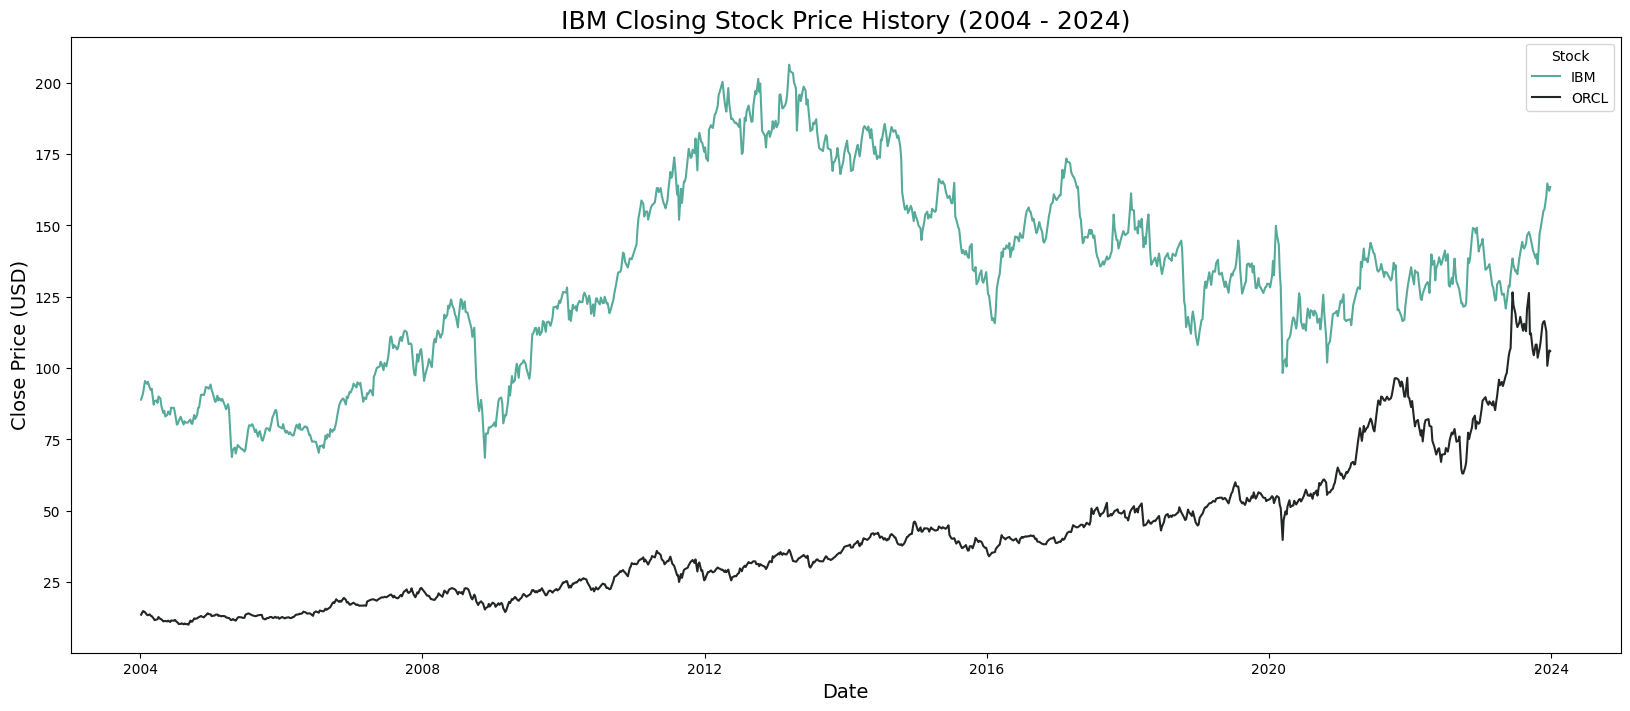

In [ ]:
#comparing the Closing Stock Prices of both IBM & Oracle from 2004 till 2024
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (20,8))
sns.lineplot(x='Date', y='Close', hue='Stock', palette = 'dark:#5A9_r', data=df)
plt.title('IBM Closing Stock Price History (2004 - 2024)',fontsize = 18)
plt.xlabel('Date',fontsize= 14)
plt.ylabel('Close Price (USD)', fontsize = 14)
plt.style.use('classic')
mpl.rcParams.update({'text.color' : "blue",
                     'axes.labelcolor' : "blue"})
plt.show()


###Splitting Dataset by Stock



*   df  = combined dataset of IBM & Oracle
*   df1 = IBM dataset
*   df2 = Oracle dataset







In [3]:
#Now, we split Oracle dataset and save a copy in csv format
df2 = df.iloc[1010:]

#resetting the index number
df2.reset_index(drop = True, inplace = True)
df2.to_csv('Data_Oracle.csv', index = False)


In [4]:
#Since df is a combined dataset consisting IBM & Oracle stock, we are splitting into 2 dataframe.
#First, we split IBM dataset and save a copy in csv format
df1 = df.iloc[:1010]

df1.to_csv('Data_IBM.csv', index=True)

df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock
1005,2023-11-27,154.990005,156.139999,154.750000,155.570007,152.649185,4053100,IBM
1006,2023-12-07,161.000000,161.470001,159.970001,160.220001,157.211868,3665500,IBM
1007,2023-12-12,163.270004,166.339996,162.919998,164.710007,161.617569,5292300,IBM
1008,2023-12-22,161.100006,162.410004,161.000000,162.139999,159.095825,2439800,IBM
1009,2023-12-27,163.139999,163.639999,162.679993,163.460007,160.391052,3234600,IBM


In [ ]:
# to returns a statistical summary for numerical data in df1
df1.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Week,Month,Year
count,1010,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03,1010.0,1010.000000,1010.000000
mean,2014-01-02 23:02:58.217821952,131.455573,132.549393,130.494327,131.528389,91.554653,5.647717e+06,26.665347,6.550495,2013.504950
min,2004-01-06 00:00:00,70.975143,71.032501,67.409180,68.585083,38.460354,1.563979e+06,1.0,1.000000,2004.000000
25%,2009-01-10 06:00:00,110.062141,111.381453,108.649620,110.353731,64.976259,3.699963e+06,14.0,4.000000,2009.000000
50%,2014-01-05 12:00:00,132.165085,133.389099,131.505730,132.514336,101.125084,4.779330e+06,27.0,7.000000,2014.000000
75%,2018-12-25 12:00:00,153.432438,154.839867,152.454472,153.379536,113.838453,6.520076e+06,40.0,10.000000,2018.000000
max,2023-12-27 00:00:00,204.894836,206.367111,203.279160,206.309753,161.617569,3.740020e+07,53.0,12.000000,2023.000000
std,NaN,32.847043,32.960097,32.755158,32.857696,28.389100,3.224027e+06,15.002639,3.436227,5.765871


In [ ]:
# to return a full statistical summary of the dataset including numerical and categorical data
df1.describe(include = 'all')

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
count,1010,1010.000000,1010.000000,1010.000000,1010.000000,1010.000000,1.010000e+03,1010,1010.0,1010.000000,1010.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,<NA>,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,IBM,<NA>,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1010,<NA>,NaN,NaN
mean,2014-01-02 23:02:58.217821952,131.455573,132.549393,130.494327,131.528389,91.554653,5.647717e+06,NaN,26.665347,6.550495,2013.504950
min,2004-01-06 00:00:00,70.975143,71.032501,67.409180,68.585083,38.460354,1.563979e+06,NaN,1.0,1.000000,2004.000000
25%,2009-01-10 06:00:00,110.062141,111.381453,108.649620,110.353731,64.976259,3.699963e+06,NaN,14.0,4.000000,2009.000000
50%,2014-01-05 12:00:00,132.165085,133.389099,131.505730,132.514336,101.125084,4.779330e+06,NaN,27.0,7.000000,2014.000000
75%,2018-12-25 12:00:00,153.432438,154.839867,152.454472,153.379536,113.838453,6.520076e+06,NaN,40.0,10.000000,2018.000000
max,2023-12-27 00:00:00,204.894836,206.367111,203.279160,206.309753,161.617569,3.740020e+07,NaN,53.0,12.000000,2023.000000


In [ ]:
#to display first 5 rows of new dataset - df1
df1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
0,2004-01-06,88.145317,89.091782,88.087952,88.967499,49.228352,4581480,IBM,2,1,2004
1,2004-01-16,90.822182,91.156792,90.544930,91.128105,50.423874,9729892,IBM,3,1,2004
2,2004-01-21,92.954109,93.728493,92.390060,93.403442,51.682884,7268654,IBM,4,1,2004
3,2004-01-26,93.594643,95.458893,93.269600,95.458893,52.820210,6474112,IBM,5,1,2004
4,2004-02-05,95.602295,95.688339,93.938812,94.512428,52.296516,6249850,IBM,6,2,2004


In [ ]:
df1['Open'].mean()

2.814030636673664e-17

In [ ]:
#saving a copy of df1 dataset before normalisation
df1_copy = df1.copy()

In [5]:
''' Since there is huge gap between min and max value of numerical data, we are going to normalise it
    Data Normalisation have 3 methods: (1. Simple Feature Scaling, 2. Min-Max, 3. Z-score)
    For df1, we will proceed with Z-Score to normalise the numerical features '''


df1['Open']      = (df1['Open'] - df1['Open'].mean()) / df1['Open'].std()
df1['High']      = (df1['High'] - df1['High'].mean()) / df1['High'].std()
df1['Low']       = (df1['Low'] - df1['Low'].mean()) / df1['Low'].std()
df1['Close']     = (df1['Close'] - df1['Close'].mean()) / df1['Close'].std()
df1['Adj Close'] = (df1['Adj Close'] - df1['Adj Close'].mean()) / df1['Adj Close'].std()
df1['Volume']    = (df1['Volume'] - df1['Volume'].mean()) / df1['Volume'].std()

df1[['Open','High','Low','Close', 'Adj Close', 'Volume']].head()

# Here is the sample calculation for Min-Max normalization for 'High' column
# df1['High'] = (df1['High']- df1['High'].min())/(df1['High'].max()- df1['High'].min())

# And here is the sample calculation for z-score normalization for 'Close' column
# df1['Close'] = (df1['Close']- df1['Close'].mean())/df1['Close'].std()


<ipython-input-5-743447fb5372>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Open']      = (df1['Open'] - df1['Open'].mean()) / df1['Open'].std()
<ipython-input-5-743447fb5372>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['High']      = (df1['High'] - df1['High'].mean()) / df1['High'].std()
<ipython-input-5-743447fb5372>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in th

,Open,High,Low,Close,Adj Close,Volume
0,-1.318544,-1.318492,-1.294647,-1.295310,-1.490935,-0.330716
1,-1.237049,-1.255840,-1.219637,-1.229553,-1.448823,1.266173
2,-1.172144,-1.177815,-1.163306,-1.160305,-1.404475,0.502768
3,-1.152644,-1.125315,-1.136454,-1.097749,-1.364413,0.256324
4,-1.091522,-1.118354,-1.116023,-1.126554,-1.382859,0.186764


In [ ]:
df1.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Week,Month,Year
count,1010,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1.010000e+03,1010.0,1010.000000,1010.000000
mean,2014-01-02 23:02:58.217821952,2.814031e-17,-3.939643e-16,-1.688418e-16,2.532628e-16,-1.688418e-16,8.442092e-17,26.665347,6.550495,2013.504950
min,2004-01-06 00:00:00,-1.841275e+00,-1.866405e+00,-1.925961e+00,-1.915634e+00,-1.870235e+00,-1.266657e+00,1.0,1.000000,2004.000000
25%,2009-01-10 06:00:00,-6.513046e-01,-6.422293e-01,-6.669089e-01,-6.444353e-01,-9.362183e-01,-6.041368e-01,14.0,4.000000,2009.000000
50%,2014-01-05 12:00:00,2.160048e-02,2.547644e-02,3.087767e-02,3.000656e-02,3.371164e-01,-2.693483e-01,27.0,7.000000,2014.000000
75%,2018-12-25 12:00:00,6.690668e-01,6.762867e-01,6.704332e-01,6.650237e-01,7.849421e-01,2.705806e-01,40.0,10.000000,2018.000000
max,2023-12-27 00:00:00,2.235795e+00,2.239609e+00,2.222088e+00,2.275916e+00,2.467951e+00,9.848703e+00,53.0,12.000000,2023.000000
std,NaN,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,15.002639,3.436227,5.765871


###Exploratory Data Analysis for IBM Dataset

In [ ]:
# saving a copy of df1 dataset
# selecting the numerical data from df1 to see correlation among the features

df1_numeric = df1.select_dtypes(include = 'number')
df1_numeric.corr()

,Open,High,Low,Close,Adj Close,Volume,Week,Month,Year
Open,1.000000,0.999573,0.999589,0.999168,0.844766,-0.313604,0.005510,0.001767,0.447474
High,0.999573,1.000000,0.999417,0.999594,0.845399,-0.304434,0.004526,0.000453,0.448779
Low,0.999589,0.999417,1.000000,0.999573,0.843760,-0.321286,0.006103,0.002005,0.444160
Close,0.999168,0.999594,0.999573,1.000000,0.844984,-0.312979,0.004311,0.000240,0.446594
Adj Close,0.844766,0.845399,0.843760,0.844984,1.000000,-0.335533,0.036679,0.033138,0.831351
Volume,-0.313604,-0.304434,-0.321286,-0.312979,-0.335533,1.000000,-0.095963,-0.103883,-0.235296
Week,0.005510,0.004526,0.006103,0.004311,0.036679,-0.095963,1.000000,0.980038,0.003617
Month,0.001767,0.000453,0.002005,0.000240,0.033138,-0.103883,0.980038,1.000000,0.001763
Year,0.447474,0.448779,0.444160,0.446594,0.831351,-0.235296,0.003617,0.001763,1.000000


In [ ]:
#importing matplotlib and listing out the plot styles available

print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


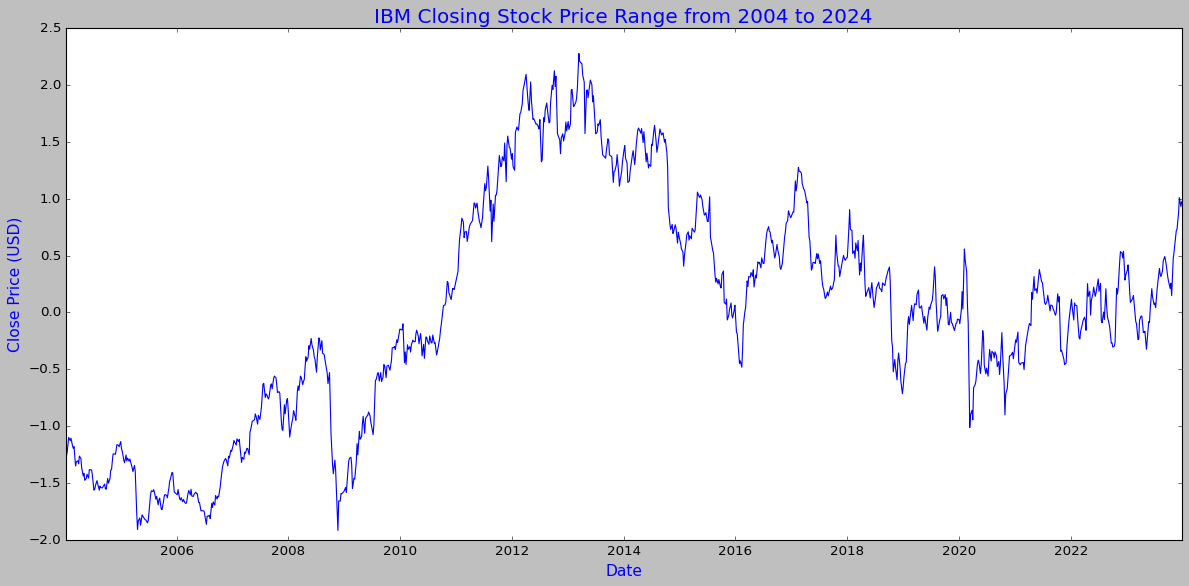

In [ ]:
#to visualise the flow of close price on weekly basis from 2004 till 2024
plt.figure(figsize = (18,8))
plt.title('IBM Closing Stock Price Range from 2004 to 2024',fontsize = 18)
plt.xlabel('Date',fontsize= 14)
plt.ylabel('Close Price (USD)', fontsize = 14)
plt.plot(df1['Date'], df1['Close'])
plt.style.use('classic')
mpl.rcParams.update({'text.color' : "blue",
                     'axes.labelcolor' : "blue"})
plt.show()


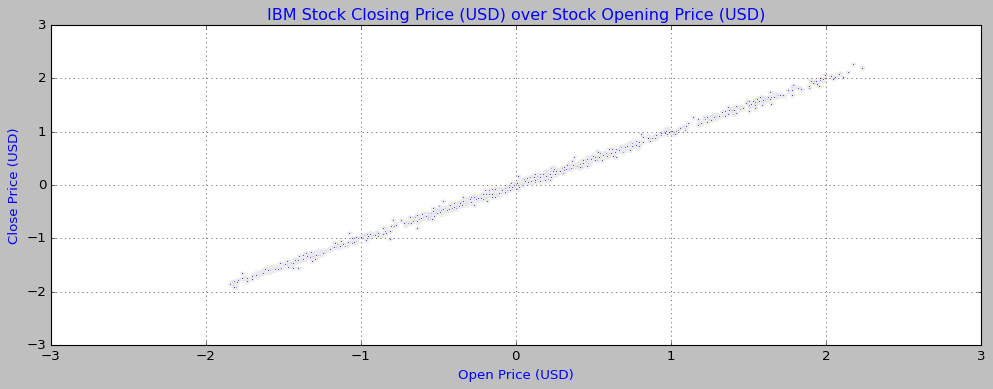

In [ ]:
#to visualize the relationship between Open and target value using scatter plot
plt.figure(figsize = (15,5))
plt.scatter(x = 'Open', y = 'Close', data = df1, marker = '*', s = 20)
plt.title('IBM Stock Closing Price (USD) over Stock Opening Price (USD)')
plt.xlabel('Open Price (USD)')
plt.ylabel('Close Price (USD)')
plt.style.use('ggplot')
plt.grid()
plt.show()

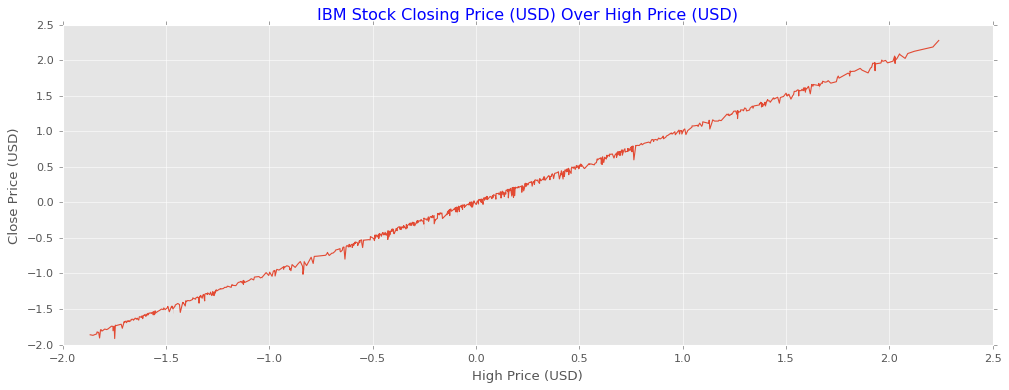

In [ ]:
#to visualize the relationship between High and dependent variable using lineplot

plt.figure(figsize = (15,5))
sns.lineplot(x = 'High', y = 'Close', data = df1)
plt.title('IBM Stock Closing Price (USD) Over High Price (USD)')
plt.xlabel('High Price (USD)')
plt.ylabel('Close Price (USD)')
plt.show()


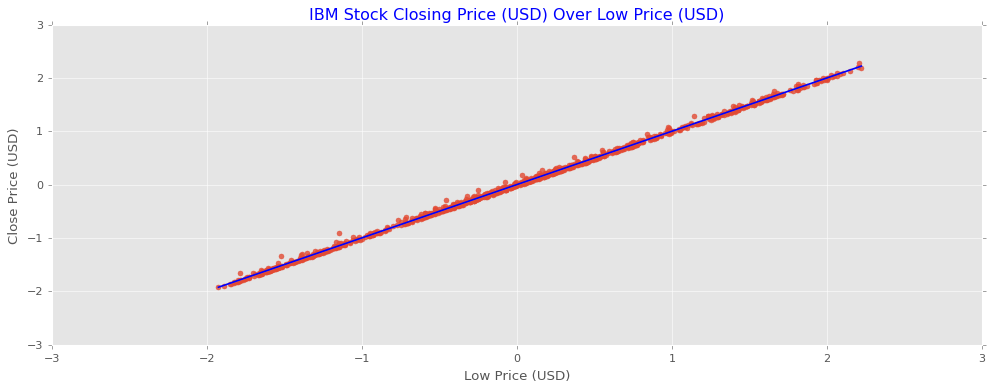

In [ ]:
#to visualize the relationship between Low and dependent variable using regplot
plt.figure(figsize = (15,5))
sns.regplot(x = 'Low', y = 'Close', data=df1, line_kws = {'color' : 'blue'})
plt.title('IBM Stock Closing Price (USD) Over Low Price (USD)')
plt.xlabel('Low Price (USD)')
plt.ylabel('Close Price (USD)')
plt.show()



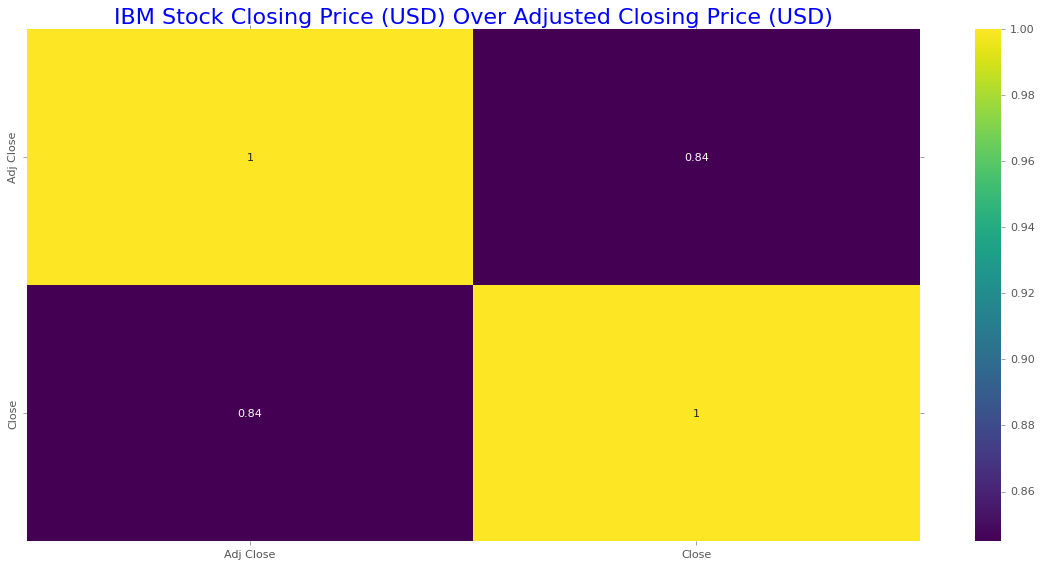

In [ ]:
#to visualise the correlation between Adj Close and target value
plt.figure(figsize = (18,8))
plt.title('IBM Stock Closing Price (USD) Over Adjusted Closing Price (USD)', fontsize = 20)
sns.heatmap(df1[['Adj Close', 'Close']].corr(), annot = True, cmap = 'viridis')
plt.show()

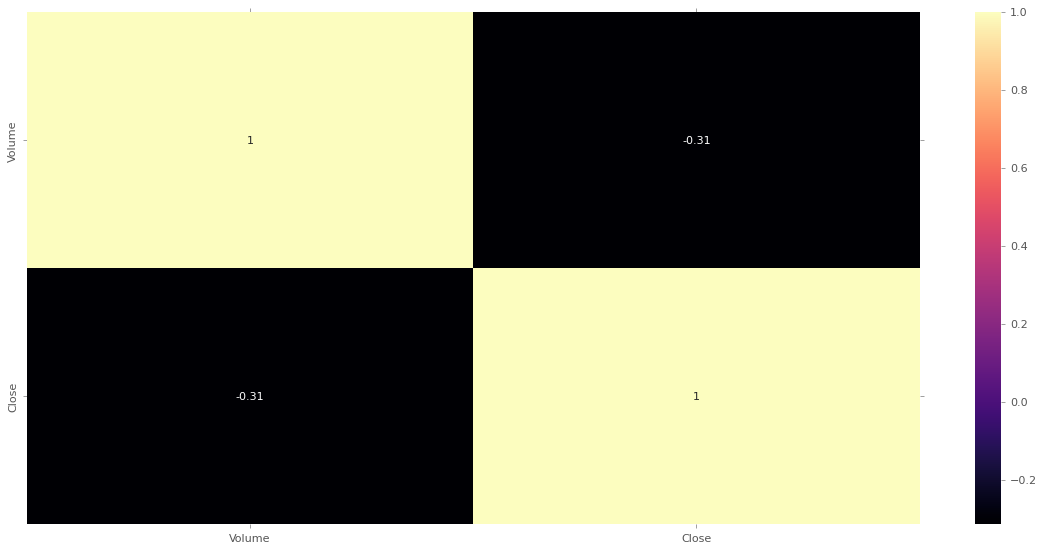

In [ ]:
#to visualise the correlation between Adj Close and target value
plt.figure(figsize = (18,8))
sns.heatmap(df1[['Volume', 'Close']].corr(), annot = True, cmap = 'magma')
plt.show()

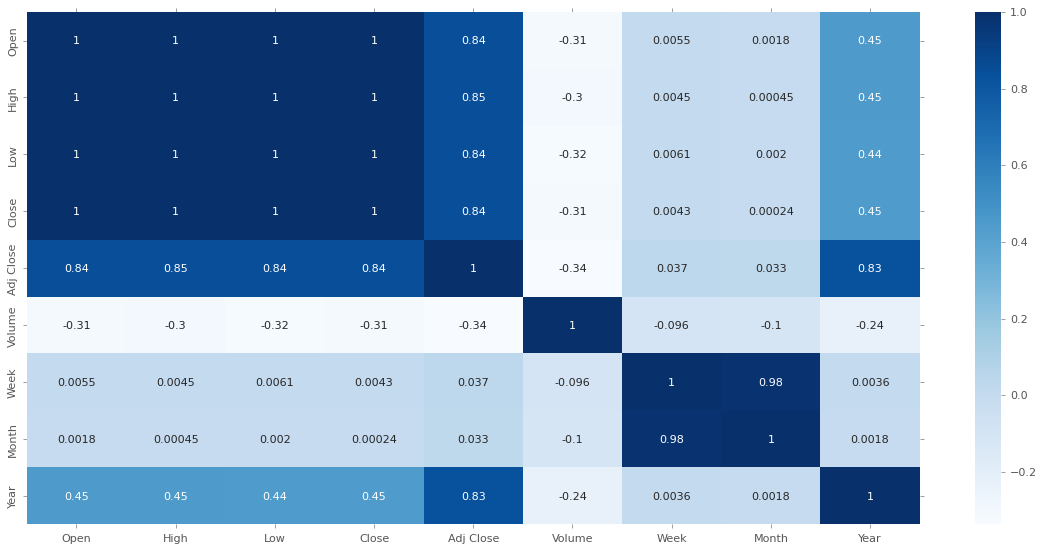

In [ ]:
#to visualise the correlation between all features
plt.figure(figsize = (18,8))
sns.heatmap(df1_numeric.corr(), annot = True, cmap = 'Blues')
plt.show()

#7. Modeling & Evaluation for IBM Dataset

In [ ]:
df1_numeric.head()

,Open,High,Low,Close,Adj Close,Volume,Week,Month,Year
0,-1.318544,-1.318492,-1.294647,-1.295310,-1.490935,-0.330716,2,1,2004
1,-1.237049,-1.255840,-1.219637,-1.229553,-1.448823,1.266173,3,1,2004
2,-1.172144,-1.177815,-1.163306,-1.160305,-1.404475,0.502768,4,1,2004
3,-1.152644,-1.125315,-1.136454,-1.097749,-1.364413,0.256324,5,1,2004
4,-1.091522,-1.118354,-1.116023,-1.126554,-1.382859,0.186764,6,2,2004


In [12]:
# converting from dataframe to array and store it in x-axis and y-axis
x = df1[['Open']]
y = df1['Close']

x[:5]

,Open
0,-1.318544
1,-1.237049
2,-1.172144
3,-1.152644
4,-1.091522


In [13]:
#splitting the dataset for training and testing
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split (x, y, train_size = 0.80, random_state = 0)

###Simple Linear Regression

In [64]:
#Modeling using Single Linear Regression algorithm
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(x_train, y_train)

#Prediction
y_hat = regr.predict(x_test)

#Evaluation
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print('The R2 Score is:', (r2_score(y_test, y_hat))*100)
print('The MSE is:', (np.mean(y_test - y_hat)**2)*100)
#print((mean_squared_error(y_test, y_hat))*100) why not same as above?
#print(mean_absolute_error(y_test, y_hat))
print('The MAE is:', np.mean(np.absolute(y_test - y_hat))*100)
print('The RMSE is:', np.sqrt(mean_squared_error(y_test, y_hat)))

The R2 Score is: 99.79584806265157
The MSE is: 0.0003747131604401755
The MAE is: 3.1795388799649023
The RMSE is: 0.0427308205933944


Text(0, 0.5, 'Stock Close Price (USD)')

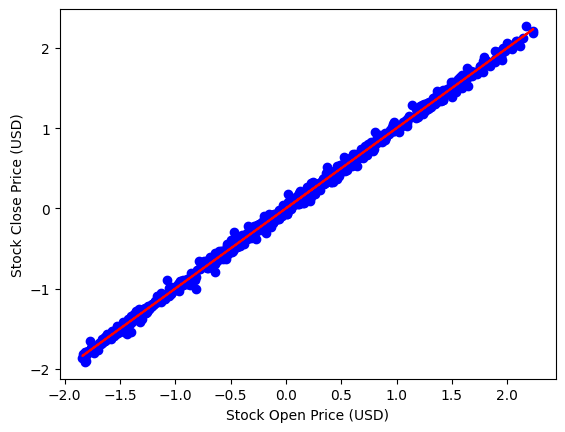

In [65]:
#to view the best fitted line  for this modeling
plt.scatter(df1['Open'], df1['Close'],  color='blue')
plt.plot(x_train, regr.coef_[0]*x_train + regr.intercept_, '-r') # Remove the extra [0] after regr.coef_
plt.xlabel("Stock Open Price (USD)")
plt.ylabel("Stock Close Price (USD)")

In [66]:
#cross validation for Single Linear Regression (Open Price vs Close Price)
#this method is not the most appropriate metric (this is suitable for classification)
#for regression model, MSE,MAE are much appropriate and accurate to validate the model
from sklearn import model_selection
from sklearn.model_selection import KFold
kfold = model_selection.KFold(n_splits=10, random_state=100, shuffle=True)
results_kfold = model_selection.cross_val_score(regr, x_test, y_test.astype('int'), cv=kfold)
print("Accuracy: ", results_kfold.mean()*100)

Accuracy:  72.8006731869048


In [67]:
#Modeling and evaluation  of Volume and Close
#assigning the columns to a variable
x1 = df1[['Volume']]
y1 = df1['Close']

#splitting dataset for training and testing
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.8, random_state = 0)

#training
regr.fit(x1_train, y1_train)

#prediction
y1_hat = regr.predict(x1_test)

#evaluation
print('The R2 Score is:', (r2_score(y1_test, y1_hat))*100)
print('The MSE is:', np.mean((y1_test - y1_hat))*100)
print('The MAE is:', np.mean((np.absolute(y1_test - y1_hat))**2)*100)
print('The RMSE is:', np.sqrt(mean_squared_error(y1_test, y1_hat)))

#very low R2 Score defines this feature is not a good fit to predict Stock Closing Price

The R2 Score is: 15.04474676712123
The MSE is: 4.598998573177919
The MAE is: 75.98348332713692
The RMSE is: 0.8716850539451558


Text(0, 0.5, 'Stock Close Price (USD)')

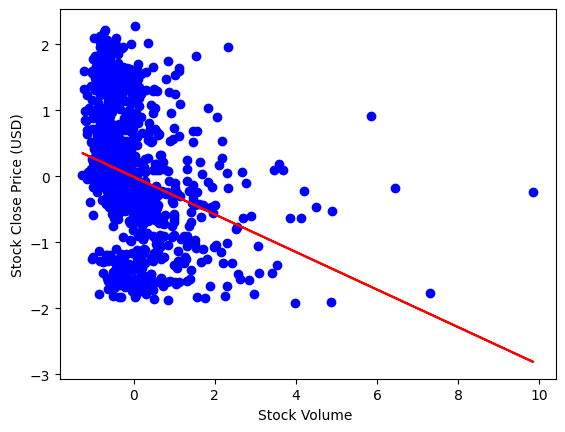

In [68]:
#to view the best fitted line  for this modeling
plt.scatter(df1['Volume'], df1['Close'],  color='blue')
plt.plot(x1_train, regr.coef_[0]*x1_train + regr.intercept_, '-r') # Remove the extra [0] after regr.coef_
plt.xlabel("Stock Volume ")
plt.ylabel("Stock Close Price (USD)")

In [69]:
#Modeling and evaluation  of Volume and Close
#assigning the columns to a variable
from sklearn.metrics import mean_squared_error, mean_absolute_error
x2 = df1[['Adj Close']]
y2 = df1['Close']

#splitting dataset for training and testing
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, train_size = 0.8, random_state = 0)

#training
regr.fit(x2_train, y2_train)

#prediction
y2_hat = regr.predict(x2_test)

#evaluation
print('The R2 Score is:', (r2_score(y2_test, y2_hat))*100)
print('The MSE is:', mean_squared_error(y2_test , y2_hat))
print('The MAE is:', mean_absolute_error(y2_test , y2_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y2_test, y2_hat)))

#very low R2 Score defines this feature is not a good fit to predict Stock Closing Price

The R2 Score is: 65.36518623868119
The MSE is: 0.30977175558028563
The MAE is: 0.44606001167654574
The RMSE is: 0.5565714290010633


Text(0, 0.5, 'Stock Close Price (USD)')

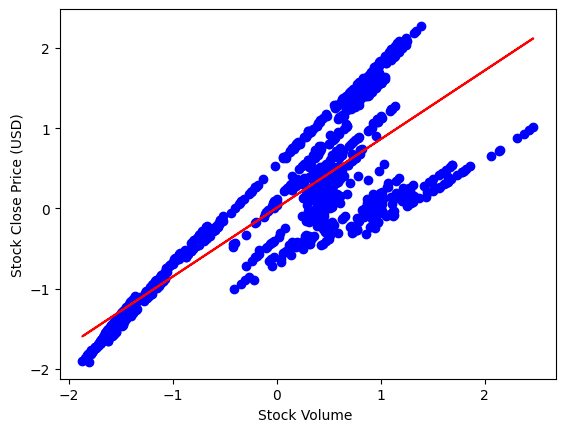

In [70]:
#to view the best fitted line  for this modeling
plt.scatter(df1['Adj Close'], df1['Close'],  color='blue')
plt.plot(x2_train, regr.coef_[0]*x2_train + regr.intercept_, '-r') # Remove the extra [0] after regr.coef_
plt.xlabel("Stock Volume ")
plt.ylabel("Stock Close Price (USD)")

In [71]:
#Modeling for High Stock Price & Stock Closing Price
x3 = df1[['High']]
y3 = df1['Close']

#splitting dataset for training and testing
x3_train, x3_test, y3_train, y3_test = train_test_split(x3, y3, train_size = 0.8, random_state = 0)

#training
regr.fit(x3_train, y3_train)

#prediction
y3_hat = regr.predict(x3_test)

#evaluation
print('The R2 Score is:', (r2_score(y3_test, y3_hat))*100)
print('The MSE is:', mean_squared_error(y3_test , y3_hat))
print('The MAE is:', mean_absolute_error(y3_test , y3_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y3_test, y3_hat)))


The R2 Score is: 99.8859927417033
The MSE is: 0.00101967427325686
The MAE is: 0.022731064720277975
The RMSE is: 0.03193233898819283


Text(0, 0.5, 'Stock Close Price (USD)')

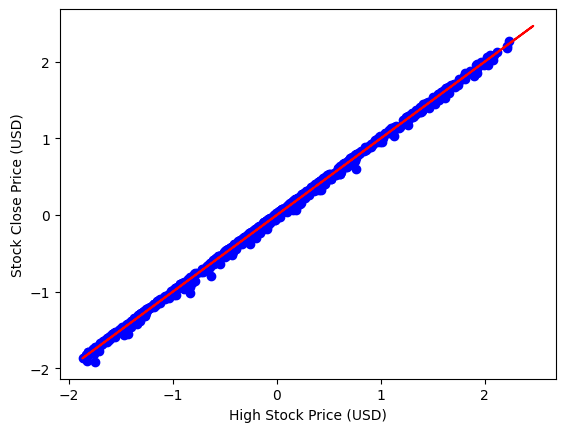

In [72]:
#to view the best fitted line  for this modeling
plt.scatter(df1['High'], df1['Close'],  color='blue')
plt.plot(x2_train, regr.coef_[0]*x2_train + regr.intercept_, '-r') # Remove the extra [0] after regr.coef_
plt.xlabel("High Stock Price (USD)")
plt.ylabel("Stock Close Price (USD)")

In [73]:
#Modeling for Low Stock Price & Stock Closing Price
x4 = df1[['Low']]
y4 = df1['Close']

#splitting dataset for training and testing
x4_train, x4_test, y4_train, y4_test = train_test_split(x4, y4, train_size = 0.8, random_state = 0)

#training
regr.fit(x4_train, y4_train)

#prediction
y4_hat = regr.predict(x4_test)

#evaluation
print('The R2 Score is:', (r2_score(y4_test, y4_hat))*100)
print('The MSE is:', np.mean((y4_test - y4_hat))*100)
print('The MAE is:', np.mean((np.absolute(y4_test - y4_hat))**2)*100)
print('The RMSE is:', np.sqrt(mean_squared_error(y4_test, y4_hat)))


The R2 Score is: 99.90718859310323
The MSE is: 0.06867306628769936
The MAE is: 0.08300998137428231
The RMSE is: 0.028811452822494445


Text(0, 0.5, 'Stock Close Price (USD)')

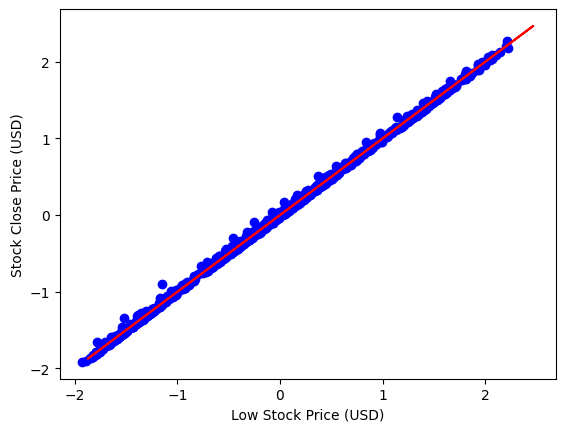

In [74]:
#to view the best fitted line  for this modeling
plt.scatter(df1['Low'], df1['Close'],  color='blue')
plt.plot(x2_train, regr.coef_[0]*x2_train + regr.intercept_, '-r') # Remove the extra [0] after regr.coef_
plt.xlabel("Low Stock Price (USD)")
plt.ylabel("Stock Close Price (USD)")

###Multiple Linear Regression

In [ ]:
df1.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'Stock',
       'Week', 'Month', 'Year'],
      dtype='object')

In [75]:
from sklearn.metrics import mean_squared_error
#Modeling using more than 1 features
x5 = df1[['Open', 'High', 'Low']]
y5 = df1['Close']

#splitting dataset for training and testing
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.8, random_state = 0)

#training
regr.fit(x5_train, y5_train)

#prediction
y5_hat = regr.predict(x5_test)
y_pred = y5_hat

#evaluation
print('The R2 Score is:', (r2_score(y5_test, y5_hat))*100)
print('The MSE is:', mean_squared_error(y5_test, y5_hat)) # Pass both y5_test (true values) and y5_hat (predicted values)
print('The MAE is:', np.mean((np.absolute(y5_test - y5_hat))**2)*100)
print('The RMSE is:', np.sqrt(mean_squared_error(y5_test, y5_hat)))

The R2 Score is: 99.94781229193343
The MSE is: 0.00046676381917045204
The MAE is: 0.04667638191704521
The RMSE is: 0.021604717521190878


In [36]:

#Modeling using more than 1 features
x5 = df1[['Open', 'High', 'Low']]
y5 = df1['Close']

#splitting dataset for training and testing
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.8, random_state = 0)

#training
regr.fit(x5_train, y5_train)

#prediction
y5_hat = regr.predict(x5_test)

#evaluation
print('The R2 Score is:', (r2_score(y5_test, y5_hat))*100)
print('The MSE is:', mean_squared_error(y5_test , y5_hat))
print('The MAE is:', mean_absolute_error(y5_test , y5_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y5_test, y5_hat)))

The R2 Score is: 99.94781229193343
The MSE is: 0.00046676381917045204
The MAE is: 0.01524422278862355
The RMSE is: 0.021604717521190878


In [37]:
#Modeling using more than 1 features
x6 = df1[['High', 'Low']]
y6 = df1['Close']

#splitting dataset for training and testing
x6_train, x6_test, y6_train, y6_test = train_test_split(x6, y6, train_size = 0.8, random_state = 0)

#training
regr.fit(x6_train, y6_train)

#prediction
y6_hat = regr.predict(x6_test)

#evaluation
print('The R2 Score is:', (r2_score(y6_test, y6_hat))*100)
print('The MSE is:', mean_squared_error(y6_test , y6_hat))
print('The MAE is:', mean_absolute_error(y6_test , y6_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y6_test, y6_hat)))

The R2 Score is: 99.93116061781707
The MSE is: 0.0006156954219192376
The MAE is: 0.018686201741590695
The RMSE is: 0.02481321063303251


In [38]:
#Modeling using more than 1 features
x7 = df1[['Adj Close', 'Volume']]
y7 = df1['Close']

#splitting dataset for training and testing
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, train_size = 0.8, random_state = 0)

#training
regr.fit(x7_train, y7_train)

#prediction
y7_hat = regr.predict(x7_test)

#evaluation
print('The R2 Score is:', (r2_score(y7_test, y7_hat))*100)
print('The MSE is:', mean_squared_error(y7_test , y7_hat))
print('The MAE is:', mean_absolute_error(y7_test , y7_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y7_test, y7_hat)))

The R2 Score is: 65.43603723644178
The MSE is: 0.30913806838588753
The MAE is: 0.446594414913852
The RMSE is: 0.55600186005614


###Single Polynomial Regression

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [39]:
#importing relevant libraries
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#assigning feature for training & testing
x8 = df1[['Open']].values
y8 = df1['Close'].values

poly = PolynomialFeatures() #Degree = 2 (default)
regr = LinearRegression()

#splitting dataset for training and testing
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x8_train_poly = poly.fit_transform(x8_train)
x8_test_poly = poly.fit_transform(x8_test)

#train the model
train_y = regr.fit(x8_train_poly, y8_train)

#prediction
y8_hat = regr.predict(x8_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y8_test, y8_hat))*100)
print('The MSE is:', mean_squared_error(y8_test , y8_hat))
print('The MAE is:', mean_absolute_error(y8_test , y8_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y8_test, y8_hat)))


The R2 Score is: 99.79606606593462
The MSE is: 0.0018239732199276416
The MAE is: 0.03179163565747648
The RMSE is: 0.0427079994840269


Text(0, 0.5, 'Stock Closing Price (USD)')

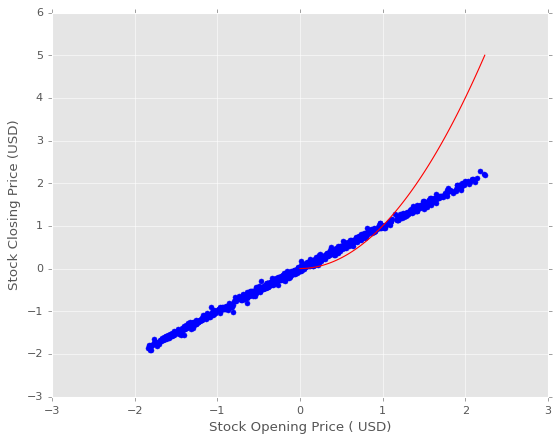

In [ ]:
#curvy line
plt.scatter(df1['Open'], df1['Close'],  color='blue')

max_open = df1['Open'].max()
XX = np.linspace(0.0, max_open, 100)
yy = regr.intercept_ + regr.coef_[0]*XX + regr.coef_[1]*np.power(XX, 2) # Access coefficients directly, assuming a polynomial model of degree 2
plt.plot(XX, yy, '-r' )
plt.xlabel("Stock Opening Price ( USD)")
plt.ylabel("Stock Closing Price (USD)")

In [40]:
#assigning feature for training & testing
x9 = df1[['Open']]
y9 = df1['Close']

poly1 = PolynomialFeatures(degree = 5)#degree is to control the sensitivity of the curve towards the distribution of data
regr1 = LinearRegression()

#splitting dataset for training and testing
x9_train, x9_test, y9_train, y9_test = train_test_split(x9, y9, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x9_train_poly = poly1.fit_transform(x9_train)
x9_test_poly = poly1.fit_transform(x9_test)

#train the model
train_y = regr1.fit(x9_train_poly, y9_train)

#prediction
y9_hat = regr1.predict(x9_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y9_test, y9_hat))*100)
print('The MSE is:', mean_squared_error(y9_test , y9_hat))
print('The MAE is:', mean_absolute_error(y9_test , y9_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y9_test, y9_hat)))

#The accuracy is improved compared to degree = 2

The R2 Score is: 99.79618099220019
The MSE is: 0.0018229453261069406
The MAE is: 0.03170166884998329
The RMSE is: 0.04269596381517743


In [41]:
#assigning feature for training & testing
x10 = df1[['High']]
y10 = df1['Close']

poly = PolynomialFeatures(degree = 3)
regr = LinearRegression()

#splitting dataset for training and testing
x10_train, x10_test, y10_train, y10_test = train_test_split(x10, y10, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x10_train_poly = poly.fit_transform(x10_train)
x10_test_poly = poly.fit_transform(x10_test)

#train the model
train_y = regr.fit(x10_train_poly, y10_train)

#prediction
y10_hat = regr.predict(x10_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y10_test, y10_hat))*100)
print('The MSE is:', mean_squared_error(y10_test , y10_hat))
print('The MAE is:', mean_absolute_error(y10_test , y10_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y10_test, y10_hat)))


The R2 Score is: 99.88609503170802
The MSE is: 0.0010187593974167347
The MAE is: 0.02284212016146325
The RMSE is: 0.03191801054916698


In [42]:
#assigning feature for training & testing
x11 = df1[['Volume']].values
y11 = df1['Close'].values

poly = PolynomialFeatures(degree = 3)#degree is to control the sensitivity of the curve towards the distribution of data
regr3 = LinearRegression()

#splitting dataset for training and testing
x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x11_train_poly = poly.fit_transform(x11_train)
x11_test_poly = poly.fit_transform(x11_test)

#train the model
train_y = regr3.fit(x11_train_poly, y11_train)

#prediction
y11_hat = regr3.predict(x11_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y11_test, y11_hat))*100)
print('The MSE is:', mean_squared_error(y11_test , y11_hat))
print('The MAE is:', mean_absolute_error(y11_test , y11_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y11_test, y11_hat)))


The R2 Score is: 20.080552824094077
The MSE is: 0.7147948774113347
The MAE is: 0.6646289163329919
The RMSE is: 0.8454554260345928


Text(0, 0.5, 'Stock Closing Price (USD)')

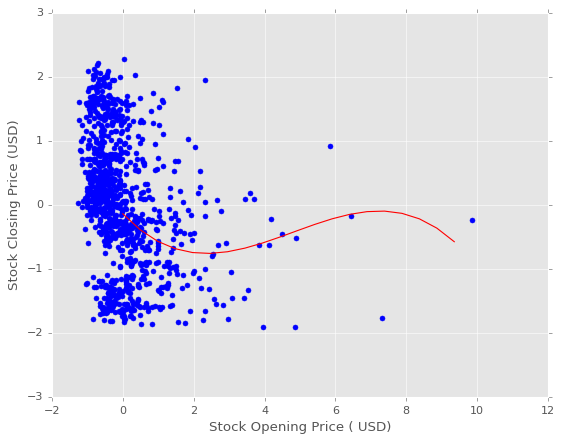

In [ ]:
#curvy line
plt.scatter(df1['Volume'], df1['Close'],  color='blue')

max_volume = df1['Volume'].max()
XX = np.arange(0.0, max_volume, max_volume/20) #adjusting the range of volume based on the maximum distribution of Volume
yy = regr3.intercept_ + regr3.coef_[1]*XX + regr3.coef_[2]*np.power(XX, 2) + regr3.coef_[3]*np.power(XX, 3)
plt.plot(XX, yy, '-r' )
plt.xlabel("Stock Opening Price ( USD)")
plt.ylabel("Stock Closing Price (USD)")

###Multiple Polynomial Regression

In [52]:
#assigning feature for training & testing
x12 = df1[['Open', 'High', 'Low']]
y12 = df1['Close']

poly = PolynomialFeatures(degree = 2)
regr = LinearRegression()

#splitting dataset for training and testing
x12_train, x12_test, y12_train, y12_test = train_test_split(x12, y12, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x12_train_poly = poly.fit_transform(x12_train)
x12_test_poly = poly.fit_transform(x12_test)

#train the model
train_y = regr.fit(x12_train_poly, y12_train)

#prediction
y12_hat = regr.predict(x12_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y12_test, y12_hat))*100)
print('The MSE is:', mean_squared_error(y12_test , y12_hat))
print('The MAE is:', mean_absolute_error(y12_test , y12_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y12_test, y12_hat)))

The R2 Score is: 99.94641698784893
The MSE is: 0.00047924333757643986
The MAE is: 0.01495557639573237
The RMSE is: 0.021891627111214


In [44]:
#assigning feature for training & testing
x13 = df1[['High', 'Low']]
y13 = df1['Close']

poly = PolynomialFeatures(degree = 6)
regr = LinearRegression()

#splitting dataset for training and testing
x13_train, x13_test, y13_train, y13_test = train_test_split(x13, y13, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x13_train_poly = poly.fit_transform(x13_train)
x13_test_poly = poly.fit_transform(x13_test)

#train the model
train_y = regr.fit(x13_train_poly, y13_train)

#prediction
y13_hat = regr.predict(x13_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y13_test, y13_hat))*100)
print('The MSE is:', mean_squared_error(y13_test , y13_hat))
print('The MAE is:', mean_absolute_error(y13_test , y13_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y13_test, y13_hat)))

The R2 Score is: 99.88891335606058
The MSE is: 0.00099355246867437
The MAE is: 0.020062612047704584
The RMSE is: 0.031520667325968366


In [45]:
#assigning feature for training & testing
x14 = df1[['Adj Close', 'Volume']]
y14 = df1['Close']

poly = PolynomialFeatures(degree = 5)
regr = LinearRegression()

#splitting dataset for training and testing
x14_train, x14_test, y14_train, y14_test = train_test_split(x14, y14, train_size = 0.8, random_state = 0)

#fitting the x axis for Polynomial Regression
x14_train_poly = poly.fit_transform(x14_train)
x14_test_poly = poly.fit_transform(x14_test)

#train the model
train_y = regr.fit(x14_train_poly, y14_train)

#prediction
y14_hat = regr.predict(x14_test_poly)

#evaluation
print('The R2 Score is:', (r2_score(y14_test, y14_hat))*100)
print('The MSE is:', mean_squared_error(y14_test , y14_hat))
print('The MAE is:', mean_absolute_error(y14_test , y14_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y14_test, y14_hat)))

The R2 Score is: 69.53113441800349
The MSE is: 0.2725117578780193
The MAE is: 0.408843805474638
The RMSE is: 0.5220265873286717


###K Nearest Neighbours Regressor

In [46]:
from sklearn.neighbors import KNeighborsRegressor
#assigning feature for training & testing
x15 = df1[['Adj Close']].values
y15 = df1['Close'].values

KNN = KNeighborsRegressor()

#splitting dataset for training and testing
x15_train, x15_test, y15_train, y15_test = train_test_split(x15, y15, train_size = 0.8, random_state = 0)

#train the model
train_y = KNN.fit(x15_train, y15_train)

#prediction
y15_hat = KNN.predict(x15_test)

#evaluation
print('The R2 Score is:', (r2_score(y15_test, y15_hat))*100)
print('The MSE is:', mean_squared_error(y15_test , y15_hat))
print('The MAE is:', mean_absolute_error(y15_test , y15_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y15_test, y15_hat)))

The R2 Score is: 66.64973752824008
The MSE is: 0.2982828037169446
The MAE is: 0.37601285390738703
The RMSE is: 0.5461527292955192


In [47]:
#Using Multiple Features
#assigning feature for training & testing
x16 = df1[['Volume', 'Adj Close']].values
y16 = df1['Close'].values

KNN = KNeighborsRegressor()

#splitting dataset for training and testing
x16_train, x16_test, y16_train, y16_test = train_test_split(x16, y16, train_size = 0.8, random_state = 0)

#train the model
train_y = KNN.fit(x16_train, y16_train)

#prediction
y16_hat = KNN.predict(x16_test)

#evaluation
print('The R2 Score is:', (r2_score(y16_test, y16_hat))*100)
print('The MSE is:', mean_squared_error(y16_test , y16_hat))
print('The MAE is:', mean_absolute_error(y16_test , y16_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y16_test, y16_hat)))

The R2 Score is: 68.0309668615462
The MSE is: 0.2859291690652382
The MAE is: 0.37663346302063366
The RMSE is: 0.534723451014857


In [48]:
#Using Multiple Features
#assigning feature for training & testing
x17 = df1[['Open', 'High', 'Low']].values
y17 = df1['Close'].values

KNN = KNeighborsRegressor()

#splitting dataset for training and testing
x17_train, x17_test, y17_train, y17_test = train_test_split(x17, y17, train_size = 0.8, random_state = 0)

#train the model
train_y = KNN.fit(x17_train, y17_train)

#prediction
y17_hat = KNN.predict(x17_test)

#evaluation
print('The R2 Score is:', (r2_score(y17_test, y17_hat))*100)
print('The MSE is:', mean_squared_error(y17_test , y17_hat))
print('The MAE is:', mean_absolute_error(y17_test , y17_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y17_test, y17_hat)))

The R2 Score is: 99.91095236392312
The MSE is: 0.0007964368669022702
The MAE is: 0.02016153854258654
The RMSE is: 0.028221213065746664


In [49]:
#Using Multiple Features
#assigning feature for training & testing
x17 = df1[['High', 'Low']].values
y17 = df1['Close'].values

KNN = KNeighborsRegressor()

#splitting dataset for training and testing
x17_train, x17_test, y17_train, y17_test = train_test_split(x17, y17, train_size = 0.8, random_state = 0)

#train the model
train_y = KNN.fit(x17_train, y17_train)

#prediction
y17_hat = KNN.predict(x17_test)

#evaluation
print('The R2 Score is:', (r2_score(y17_test, y17_hat))*100)
print('The MSE is:', mean_squared_error(y17_test , y17_hat))
print('The MAE is:', mean_absolute_error(y17_test , y17_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y17_test, y17_hat)))

The R2 Score is: 99.92206750022129
The MSE is: 0.0006970237357006655
The MAE is: 0.019187804195691712
The RMSE is: 0.02640120708794705


###XGBoost Regressor

In [54]:
#installing xgboost library and importing the algorithm
!pip install xgboost
from xgboost import XGBRegressor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.9/190.9 MB 5.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.3.1+cu121 requires nvidia-cublas-cu12==12.1.3.1; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-cupti-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-nvrtc-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cuda-runtime-cu12==12.1.105; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requires nvidia-cudnn-cu12==8.9.2.26; platform_system == "Linux" and platform_machine == "x86_64", which is not installed.
torch 2.3.1+cu121 requ

In [55]:
#splitting the dataset for x-axis and y-axis
x18 = df1[['Low']].values
y18 = df1['Close'].values

XGB = XGBRegressor()

#splitting dataset for training and testing
x18_train, x18_test, y18_train, y18_test = train_test_split(x18, y18, train_size = 0.8, random_state = 0)

#train the model
train_y = XGB.fit(x18_train, y18_train)

#prediction
y18_hat = XGB.predict(x18_test)

#evaluation
print('The R2 Score is:', (r2_score(y18_test, y18_hat))*100)
print('The MSE is:', np.mean((y18_test - y18_hat))*100)
print('The MAE is:', np.mean((np.absolute(y18_test - y18_hat))**2)*100)
print('The RMSE is:', np.sqrt(mean_squared_error(y18_test, y18_hat)))

The R2 Score is: 99.8708666876353
The MSE is: 0.12929950863613668
The MAE is: 0.11549608192144416
The RMSE is: 0.03398471449364319


In [56]:
#Multiple variable over dependant variable
#splitting the dataset for x-axis and y-axis
x19 = df1[['Open', 'High', 'Low']].values
y19 = df1['Close'].values

XGB = XGBRegressor()

#splitting dataset for training and testing
x19_train, x19_test, y19_train, y19_test = train_test_split(x19, y19, train_size = 0.8, random_state = 0)

#train the model
train_y = XGB.fit(x19_train, y19_train)

#prediction
y19_hat = XGB.predict(x19_test)

#evaluation
print('The R2 Score is:', (r2_score(y19_test, y19_hat))*100)
print('The MSE is:', mean_squared_error(y19_test, y19_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(y19_test, y19_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y19_test, y19_hat)))

The R2 Score is: 99.8715437202825
The MSE is: 0.0011489054786788487
The MAE is: 0.02275776102728247
The RMSE is: 0.03389550823750617


In [57]:
#splitting the dataset for x-axis and y-axis
x20 = df1[['Adj Close', 'Volume']].values
y20 = df1['Close'].values

XGB = XGBRegressor()

#splitting dataset for training and testing
x20_train, x20_test, y20_train, y20_test = train_test_split(x20, y20, train_size = 0.8, random_state = 0)

#train the model
train_y = XGB.fit(x20_train, y20_train)

#prediction
y20_hat = XGB.predict(x20_test)

#evaluation
print('The R2 Score is:', (r2_score(y20_test, y20_hat))*100)
print('The MSE is:', mean_squared_error(y20_test, y20_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(y20_test, y20_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y20_test, y20_hat)))

The R2 Score is: 65.07569999430963
The MSE is: 0.3123609036771487
The MAE is: 0.3856413241830916
The RMSE is: 0.5588925689943898


In [58]:
# Perform Grid Search (hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x19_train, y19_train)

# Best parameters and evaluation on test set
best_model = grid_search.best_estimator_
y19_hat = best_model.predict(x19_test)

print("Best parameters found: ", grid_search.best_params_)
print('The R2 Score is:', r2_score(y19_test, y19_hat) * 100)
print('The MSE is:', mean_squared_error(y19_test, y19_hat))
print('The MAE is:', mean_absolute_error(y19_test, y19_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y19_test, y19_hat)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
The R2 Score is: 99.89364401735968
The MSE is: 0.0009512417097433596
The MAE is: 0.021412173574282104
The RMSE is: 0.030842206628958306


In [ ]:
# Perform Grid Search (hyper parameter tuning)
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

scoring = make_scorer(mean_squared_error, greater_is_better=False)

grid_search = GridSearchCV(estimator=XGBRegressor(), param_grid=param_grid, scoring=scoring, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(x19_train, y19_train)

# Best parameters and evaluation on test set
best_model = grid_search.best_estimator_
y19_hat = best_model.predict(x19_test)

print("Best parameters found: ", grid_search.best_params_)
print('The R2 Score is:', r2_score(y19_test, y19_hat) * 100)
print('The MSE is:', mean_squared_error(y19_test, y19_hat))
print('The MAE is:', mean_absolute_error(y19_test, y19_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(y19_test, y19_hat)))

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}
The R2 Score is: 99.89364401735968
The MSE is: 0.0009512417097433596
The MAE is: 0.021412173574282104
The RMSE is: 0.030842206628958306


###Decision Tree Regression

In [ ]:
from sklearn.tree import DecisionTreeRegressor

#splitting the dataset for x-axis and y-axis
X = df1[['Low']].values
Y = df1['Close'].values

tree = DecisionTreeRegressor()

#splitting dataset for training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size = 0.8, random_state = 0)

#train the model
train_Y = tree.fit(X_train, Y_train)

#prediction
Y_hat = tree.predict(X_test)

#evaluation
print('The R2 Score is:', (r2_score(Y_test, Y_hat))*100)
print('The MSE is:', mean_squared_error(Y_test, Y_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y_test, Y_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y_test, Y_hat)))

The R2 Score is: 99.8210914730015
The MSE is: 0.0016001474377351221
The MAE is: 0.028376525916418146
The RMSE is: 0.04000184292923417


In [ ]:
#splitting the dataset for x-axis and y-axis
X1 = df1[['Adj Close', 'Volume']].values
Y1= df1['Close'].values

tree = DecisionTreeRegressor()

#splitting dataset for training and testing
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.8, random_state = 0)

#train the model
train_Y = tree.fit(X1_train, Y1_train)

#prediction
Y1_hat = tree.predict(X1_test)

#evaluation
print('The R2 Score is:', (r2_score(Y1_test, Y1_hat))*100)
print('The MSE is:', mean_squared_error(Y1_test, Y1_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y1_test, Y1_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y1_test, Y1_hat)))

The R2 Score is: 59.790223630079765
The MSE is: 0.35963389621317804
The MAE is: 0.35539262988952264
The RMSE is: 0.5996948359067118


In [ ]:
#splitting the dataset for x-axis and y-axis
X1 = df1[['Open','High','Low']].values
Y1= df1['Close'].values

tree = DecisionTreeRegressor()

#splitting dataset for training and testing
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, train_size = 0.8, random_state = 0)

#train the model
train_Y = tree.fit(X1_train, Y1_train)

#prediction
Y1_hat = tree.predict(X1_test)

#evaluation
print('The R2 Score is:', (r2_score(Y1_test, Y1_hat))*100)
print('The MSE is:', mean_squared_error(Y1_test, Y1_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y1_test, Y1_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y1_test, Y1_hat)))

The R2 Score is: 99.83791828116992
The MSE is: 0.001449649446232536
The MAE is: 0.026619019678342144
The RMSE is: 0.03807426225460627


###Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor

#splitting the dataset for x-axis and y-axis
X2= df1[['Low']].values
Y2= df1['Close'].values

rand = RandomForestRegressor()

#splitting dataset for training and testing
X2_train, X2_test, Y2_train, Y2_test = train_test_split(X2, Y2, train_size = 0.8, random_state = 0)

#train the model
train_Y = rand.fit(X2_train, Y2_train)

#prediction
Y2_hat = rand.predict(X2_test)

#evaluation
print('The R2 Score is:', (r2_score(Y2_test, Y2_hat))*100)
print('The MSE is:', mean_squared_error(Y2_test, Y2_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y2_test, Y2_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y2_test, Y2_hat)))

The R2 Score is: 99.8685436351298
The MSE is: 0.0011757380654237076
The MAE is: 0.02443186197937529
The RMSE is: 0.03428903710260333


In [ ]:
#Modeling for multiple features over target value
#splitting the dataset for x-axis and y-axis
X3= df1[['Adj Close', 'Volume']].values
Y3= df1['Close'].values

rand = RandomForestRegressor()

#splitting dataset for training and testing
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, train_size = 0.8, random_state = 0)

#train the model
train_Y = rand.fit(X3_train, Y3_train)

#prediction
Y3_hat = rand.predict(X3_test)

#evaluation
print('The R2 Score is:', (r2_score(Y3_test, Y3_hat))*100)
print('The MSE is:', mean_squared_error(Y3_test, Y3_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y3_test, Y3_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y3_test, Y3_hat)))

The R2 Score is: 69.33359585343268
The MSE is: 0.27427853128594365
The MAE is: 0.3576487575666589
The RMSE is: 0.5237160788881163


In [ ]:
#Modeling for multiple features over target value
#splitting the dataset for x-axis and y-axis
X3= df1[['Open','High','Low']].values
Y3= df1['Close'].values

rand = RandomForestRegressor()

#splitting dataset for training and testing
X3_train, X3_test, Y3_train, Y3_test = train_test_split(X3, Y3, train_size = 0.8, random_state = 0)

#train the model
train_Y = rand.fit(X3_train, Y3_train)

#prediction
Y3_hat = rand.predict(X3_test)

#evaluation
print('The R2 Score is:', (r2_score(Y3_test, Y3_hat))*100)
print('The MSE is:', mean_squared_error(Y3_test, Y3_hat)) #calculation behind the code
print('The MAE is:', mean_absolute_error(Y3_test, Y3_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y3_test, Y3_hat)))

The R2 Score is: 99.91848182268933
The MSE is: 0.0007290938265542043
The MAE is: 0.019595200725212255
The RMSE is: 0.027001737472877634


###Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Define features and target variable
X4 = df1[['Volume']].values
Y4 = df1['Close'].values

# Split the dataset
X4_train, X4_test, Y4_train, Y4_test = train_test_split(X4, Y4, train_size=0.8, random_state=0)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X4_train, Y4_train)

# Extract the best model
best_gbr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
Y4_hat = best_gbr.predict(X4_test)

# Evaluation metrics
print('The R2 Score is:', r2_score(Y4_test, Y4_hat) * 100)
print('The MSE is:', mean_squared_error(Y4_test, Y4_hat))
print('The MAE is:', mean_absolute_error(Y4_test, Y4_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y4_test, Y4_hat)))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
The R2 Score is: 16.908090761712792
The MSE is: 0.7431691931893296
The MAE is: 0.6711323553580375
The RMSE is: 0.8620726148007078


In [ ]:
# Define features and target variable
X5 = df1[['Low']].values
Y5 = df1['Close'].values

# Split the dataset
X5_train, X5_test, Y5_train, Y5_test = train_test_split(X5, Y5, train_size=0.8, random_state=0)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X5_train, Y5_train)

# Extract the best model
best_gbr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
Y5_hat = best_gbr.predict(X5_test)

# Evaluation metrics
print('The R2 Score is:', r2_score(Y5_test, Y5_hat) * 100)
print('The MSE is:', mean_squared_error(Y5_test, Y5_hat))
print('The MAE is:', mean_absolute_error(Y5_test, Y5_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y5_test, Y5_hat)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
The R2 Score is: 99.89325149432858
The MSE is: 0.0009547524128550789
The MAE is: 0.022426269479442137
The RMSE is: 0.030899068155125307


In [ ]:
# Define features and target variable
X6 = df1[['High', 'Low']].values
Y6 = df1['Close'].values

# Split the dataset
X6_train, X6_test, Y6_train, Y6_test = train_test_split(X6, Y6, train_size=0.8, random_state=0)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X6_train, Y6_train)

# Extract the best model
best_gbr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
Y6_hat = best_gbr.predict(X6_test)

# Evaluation metrics
print('The R2 Score is:', r2_score(Y6_test, Y6_hat) * 100)
print('The MSE is:', mean_squared_error(Y6_test, Y6_hat))
print('The MAE is:', mean_absolute_error(Y6_test, Y6_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y6_test, Y6_hat)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 100}
The R2 Score is: 99.91426077415142
The MSE is: 0.0007668466386521422
The MAE is: 0.021098993527997604
The RMSE is: 0.027691995931173725


In [ ]:
# Define features and target variable
X7 = df1[['Adj Close', 'Volume']].values
Y7 = df1['Close'].values

# Split the dataset
X7_train, X7_test, Y7_train, Y7_test = train_test_split(X7, Y7, train_size=0.8, random_state=0)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X7_train, Y7_train)

# Extract the best model
best_gbr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
Y7_hat = best_gbr.predict(X7_test)

# Evaluation metrics
print('The R2 Score is:', r2_score(Y7_test, Y7_hat) * 100)
print('The MSE is:', mean_squared_error(Y7_test, Y7_hat))
print('The MAE is:', mean_absolute_error(Y7_test, Y7_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y7_test, Y7_hat)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}
The R2 Score is: 72.43922261090425
The MSE is: 0.2465019865795445
The MAE is: 0.3743011748305649
The RMSE is: 0.4964896641215651


In [ ]:
# Define features and target variable
X8 = df1[['Open', 'High', 'Low']].values
Y8 = df1['Close'].values

# Split the dataset
X8_train, X8_test, Y8_train, Y8_test = train_test_split(X8, Y8, train_size=0.8, random_state=0)

# Define the model
gbr = GradientBoostingRegressor()

# Define the parameter grid (hyperparameter tuning)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X8_train, Y8_train)

# Extract the best model
best_gbr = grid_search.best_estimator_

# Print the best parameters
print("Best parameters found: ", grid_search.best_params_)

# Make predictions
Y8_hat = best_gbr.predict(X8_test)

# Evaluation metrics
print('The R2 Score is:', r2_score(Y8_test, Y8_hat) * 100)
print('The MSE is:', mean_squared_error(Y8_test, Y8_hat))
print('The MAE is:', mean_absolute_error(Y8_test, Y8_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(Y8_test, Y8_hat)))

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best parameters found:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 300}
The R2 Score is: 99.91423169675421
The MSE is: 0.0007671067051978732
The MAE is: 0.020205573701655485
The RMSE is: 0.027696691231948144









###Accuracy Comparison for Single Feature over Stock Close Price (USD)

In [ ]:
# Algorithms and their accuracy rates
algorithms = [
    'Simple Linear Regression',
    'Simple Linear Regression (Degree-2)',
    'Simple Linear Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

# Corresponding accuracy rates
accuracy_rates = [
    99.795,    # Simple Linear Regression
    99.7960,   # Simple Linear Regression (Degree-2)
    99.7961,   # Simple Linear Regression (Degree-5)
    99.770,    # KNN Regressor
    99.740,    # XGB Regressor
    99.712,    # Decision Tree Regressor
    99.757,    # Random Forest Regressor
    99.770     # Gradient Boosting Regression
]

# Define colors for each algorithm
colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]


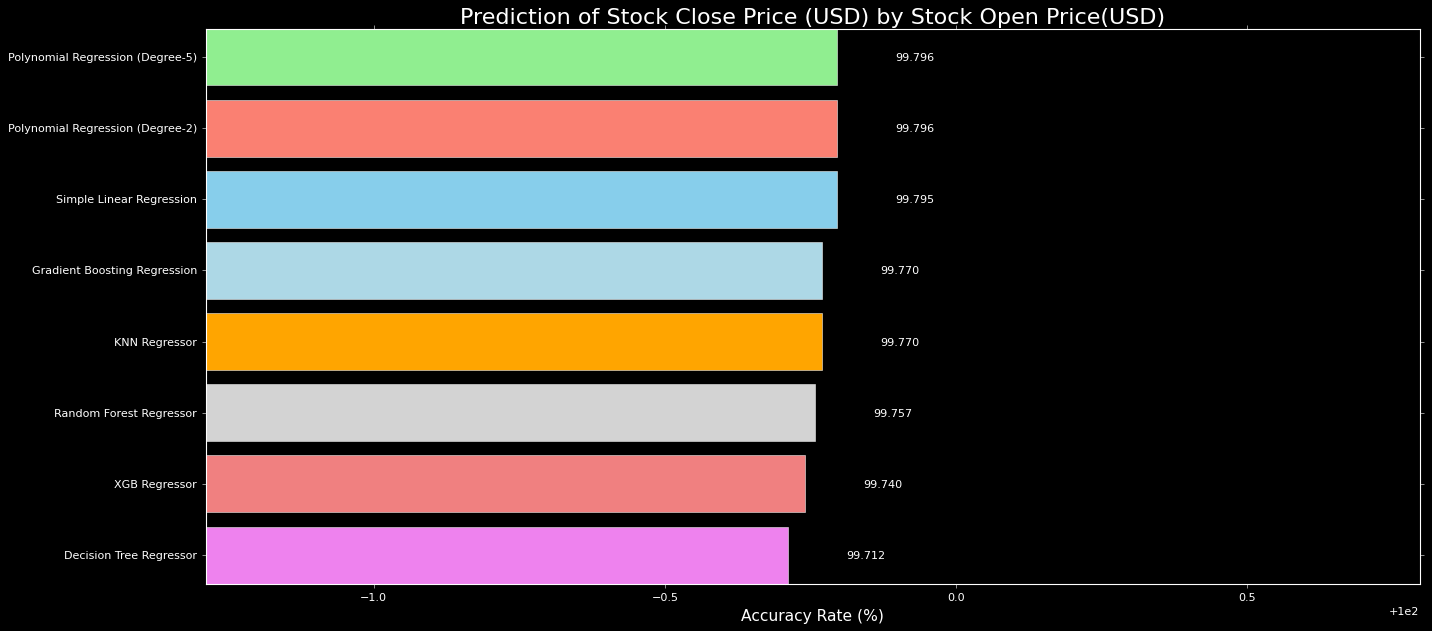

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
algorithms = [
    'Simple Linear Regression',
    'Polynomial Regression (Degree-2)',
    'Polynomial Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    99.795,    # Simple Linear Regression
    99.7960,   # Polynomial Regression (Degree-2)
    99.7961,   # Polynomial Regression (Degree-5)
    99.770,    # KNN Regressor
    99.740,    # XGB Regressor
    99.712,    # Decision Tree Regressor
    99.757,    # Random Forest Regressor
    99.770     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]


# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Stock Open Price(USD)', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()


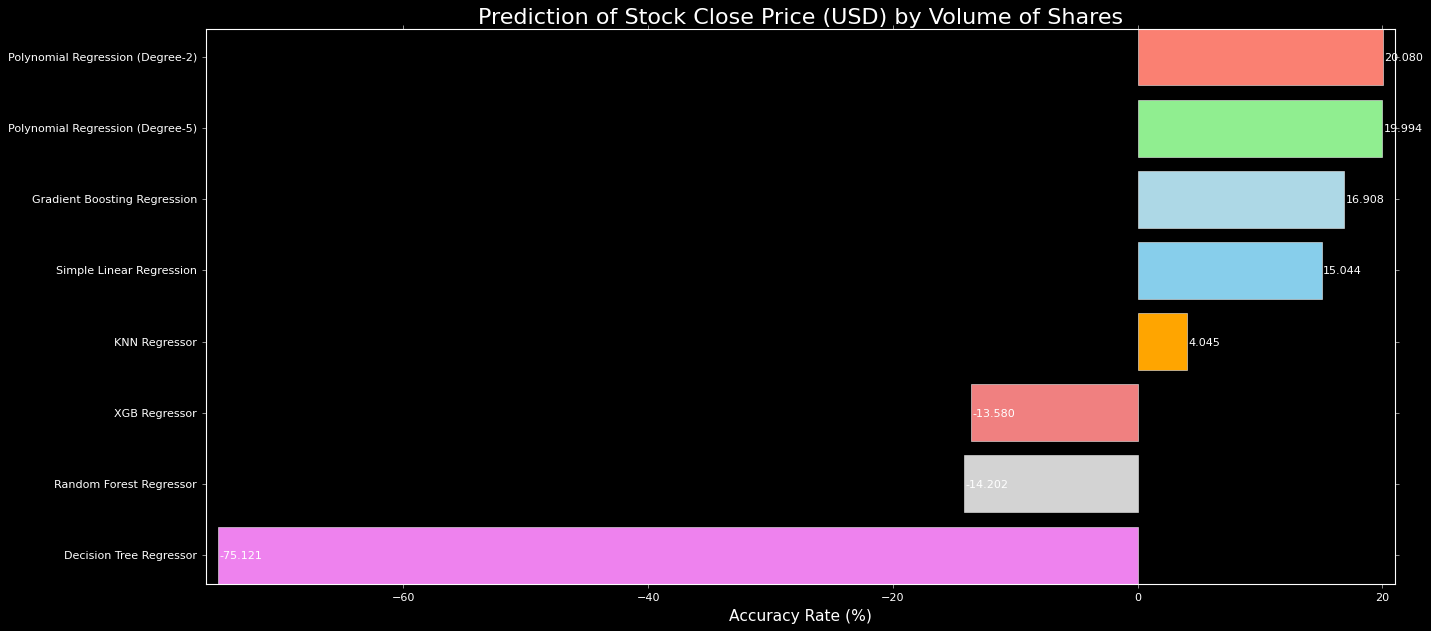

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
algorithms = [
    'Simple Linear Regression',
    'Polynomial Regression (Degree-2)',
    'Polynomial Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    15.044,    # Simple Linear Regression
    20.080,   # Polynomial Regression (Degree-3)
    19.994,   # Polynomial Regression (Degree-5)
    4.045,    # KNN Regressor
    -13.580,    # XGB Regressor
    -75.121,    # Decision Tree Regressor
    -14.202,    # Random Forest Regressor
    16.908     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Volume of Shares', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()


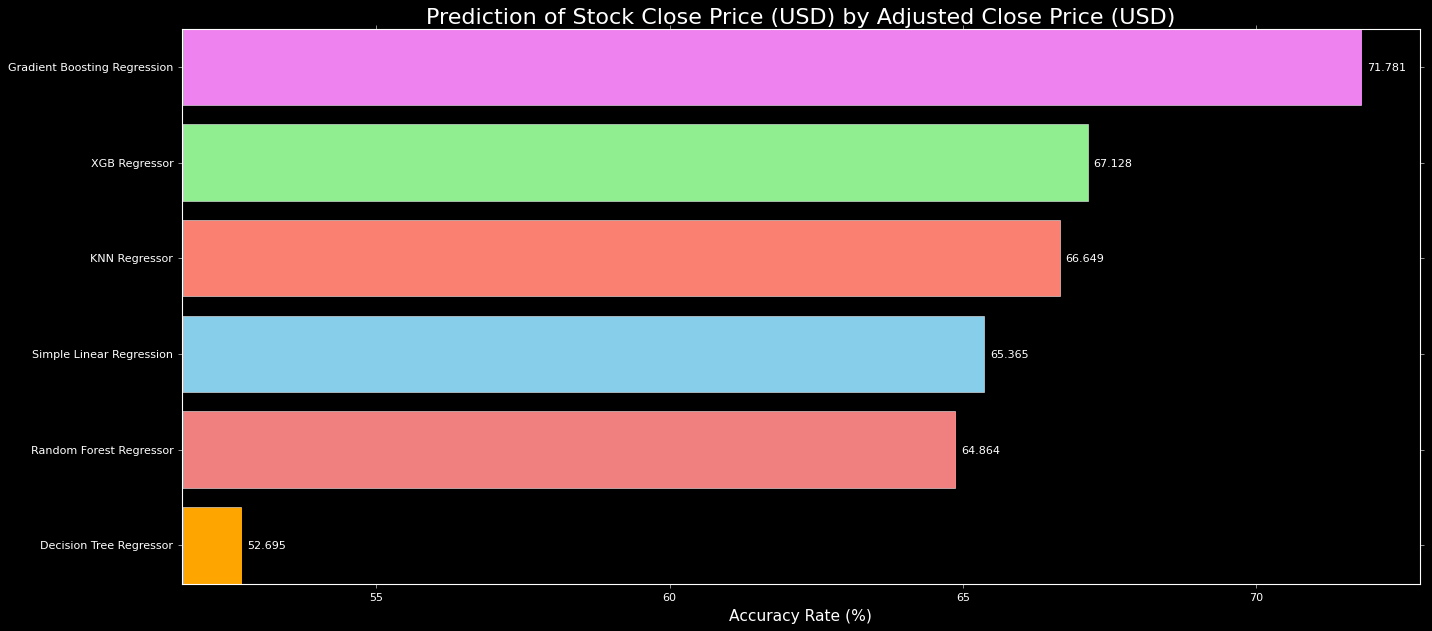

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define data
algorithms = [
    'Simple Linear Regression',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    65.365,    # Simple Linear Regression
    66.649,    # KNN Regressor
    67.128,    # XGB Regressor
    52.695,    # Decision Tree Regressor
    64.864,    # Random Forest Regressor
    71.781     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background

fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Adjusted Close Price (USD)', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()


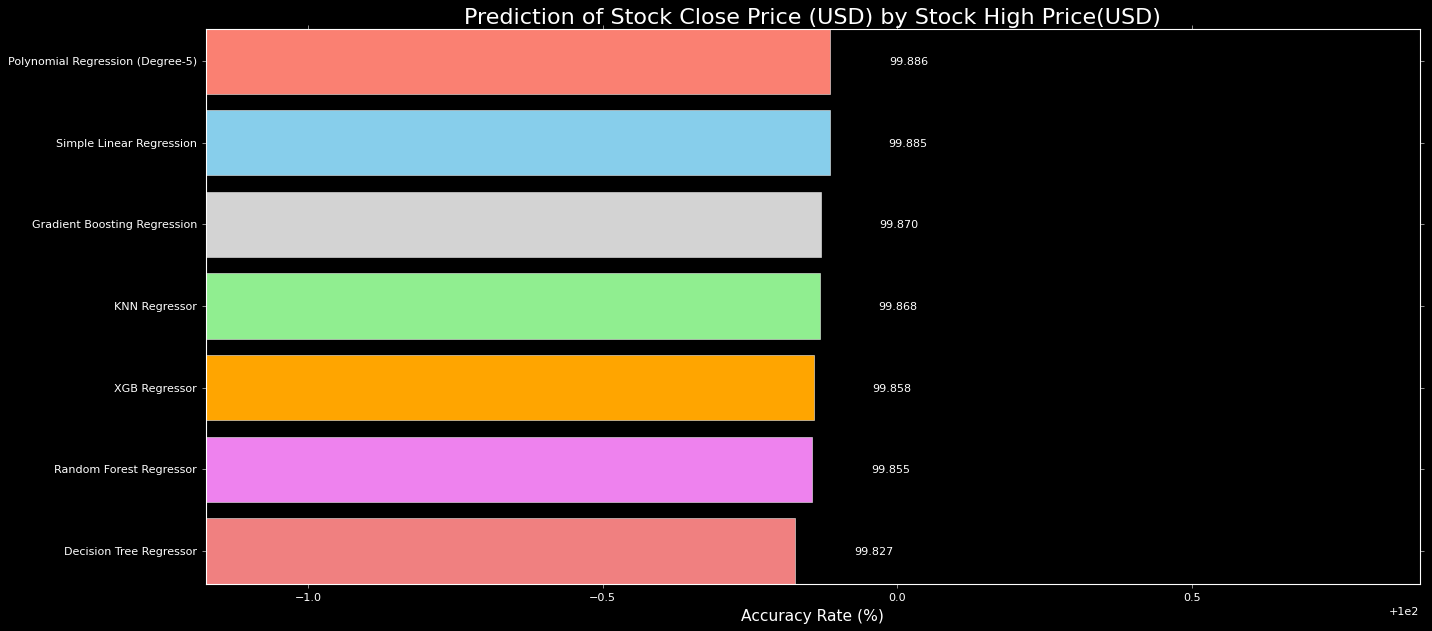

In [ ]:
# Define data
algorithms = [
    'Simple Linear Regression',
    'Polynomial Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    99.885,    # Simple Linear Regression
    99.886,    # Polynomial Regression (Degree-3)
    99.868,    # KNN Regressor
    99.858,    # XGB Regressor
    99.827,    # Decision Tree Regressor
    99.855,    # Random Forest Regressor
    99.870     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Stock High Price(USD)', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
1005,2023-11-27,0.716486,0.715732,0.740515,0.731689,2.152042,-0.494604,IBM,48,11,2023
1006,2023-12-07,0.899455,0.877443,0.899879,0.873208,2.312761,-0.614826,IBM,49,12,2023
1007,2023-12-12,0.968563,1.025197,0.989941,1.009858,2.467951,-0.110240,IBM,50,12,2023
1008,2023-12-22,0.902499,0.905962,0.931324,0.931642,2.379123,-0.995003,IBM,51,12,2023
1009,2023-12-27,0.964605,0.943280,0.982614,0.971815,2.424747,-0.748479,IBM,52,12,2023


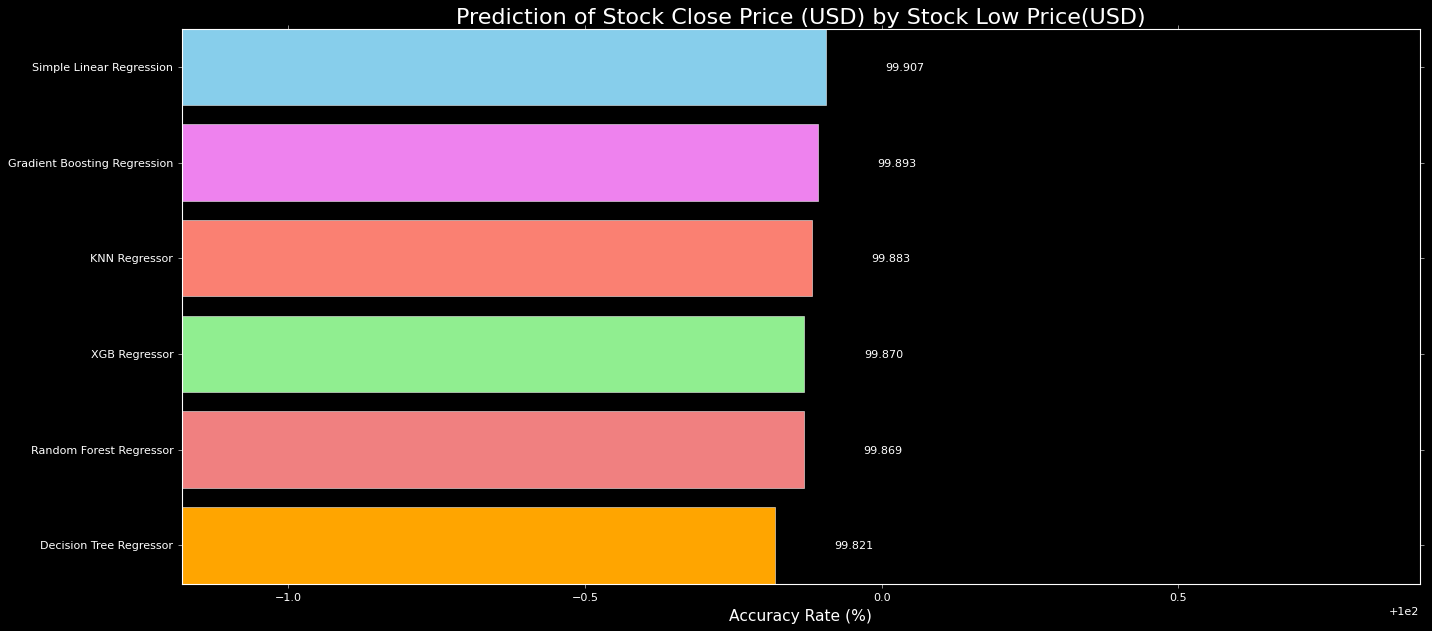

In [ ]:
# Define data
algorithms = [
    'Simple Linear Regression',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    99.907,    # Simple Linear Regression
    99.883,    # KNN Regressor
    99.870,    # XGB Regressor
    99.821,    # Decision Tree Regressor
    99.869,    # Random Forest Regressor
    99.893     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Stock Low Price(USD)', color='white', fontsize = 20)

# Adjust x-axis limits
#ax.set_xlim(99.7, 99.85)  # Set the limits based on the range of accuracy rates
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()

###Accuracy Comparison for Multiple Features over Stock Close Price (USD)

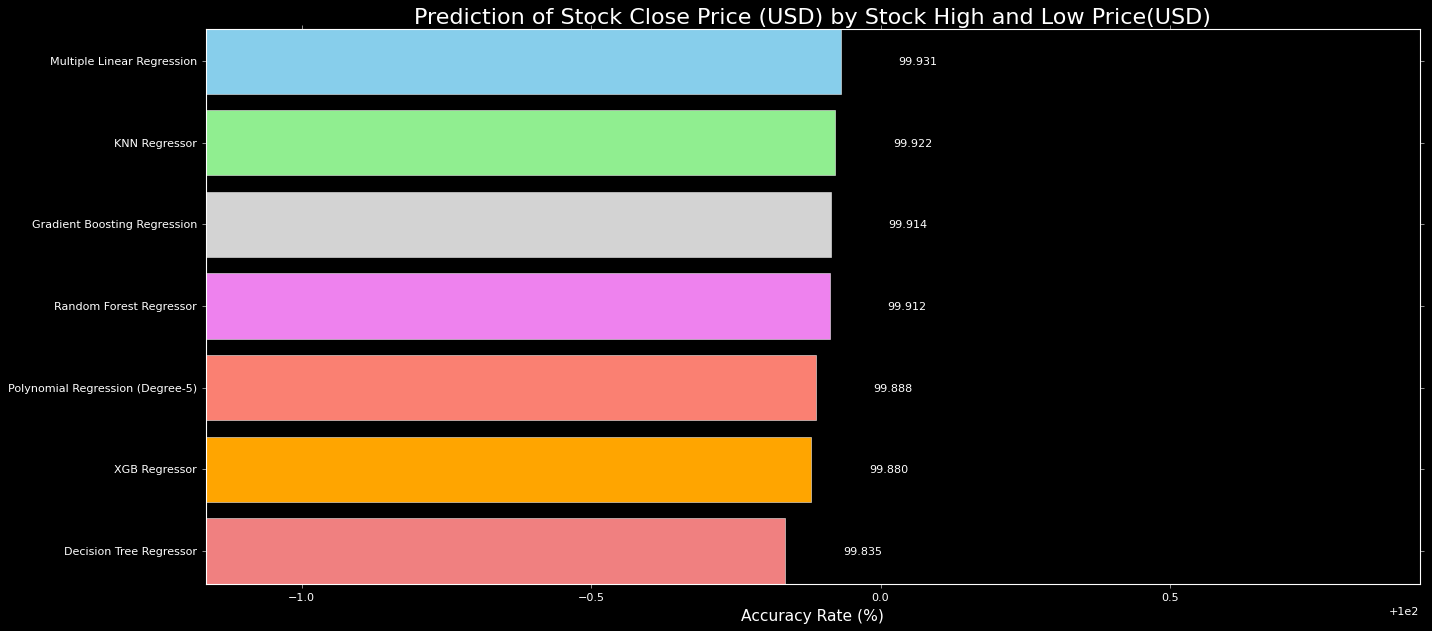

In [ ]:
# Define data
algorithms = [
    'Multiple Linear Regression',
    'Polynomial Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    99.931,    # Multiple Linear Regression
    99.888,    # Polynomial Regression (Degree-6)
    99.922,    # KNN Regressor
    99.880,    # XGB Regressor
    99.835,    # Decision Tree Regressor
    99.912,    # Random Forest Regressor
    99.914     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]


# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Stock High and Low Price(USD)', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()

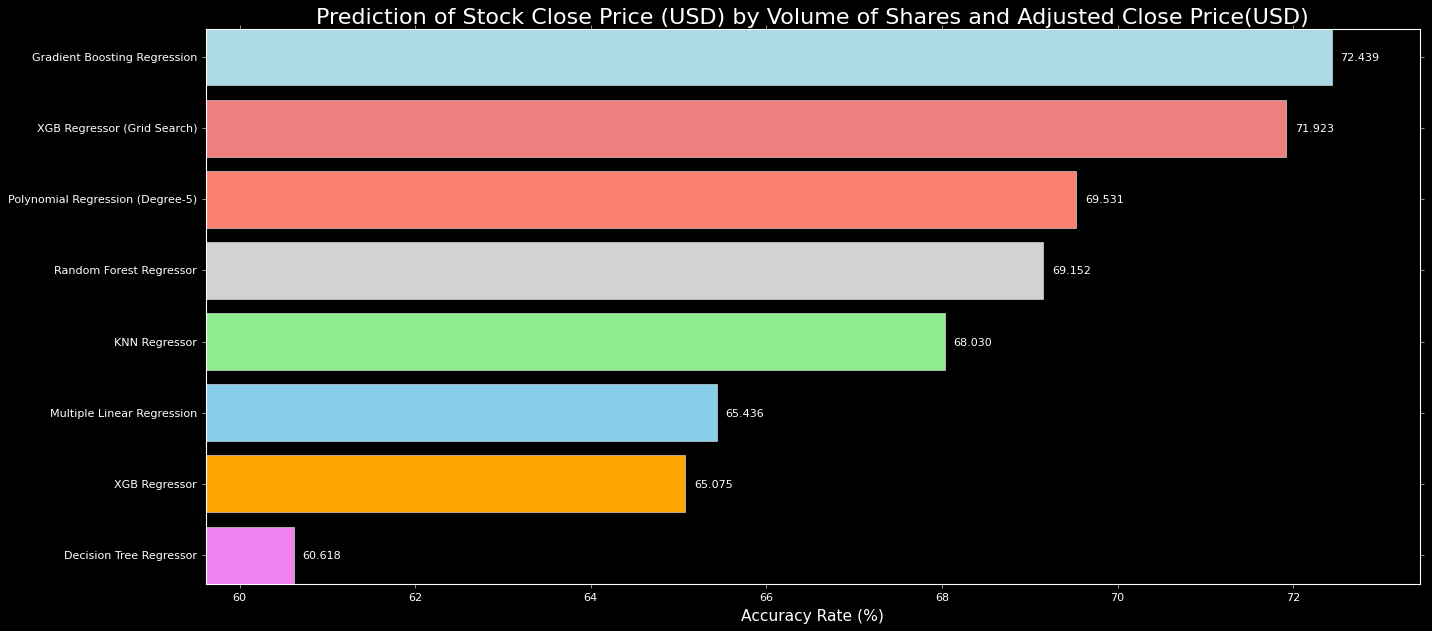

In [ ]:
# Define data
algorithms = [
    'Multiple Linear Regression',
    'Polynomial Regression (Degree-5)',
    'KNN Regressor',
    'XGB Regressor',
    'XGB Regressor (Grid Search)',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    65.436,    # Multiple Linear Regression
    69.531,    # Polynomial Regression (Degree-5)
    68.030,    # KNN Regressor
    65.075,    # XGB Regressor
    71.923,    # XGB Regressor (Hyperparam tuning)
    60.618,    # Decision Tree Regressor
    69.152,    # Random Forest Regressor
    72.439     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]


# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Volume of Shares and Adjusted Close Price(USD)', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()

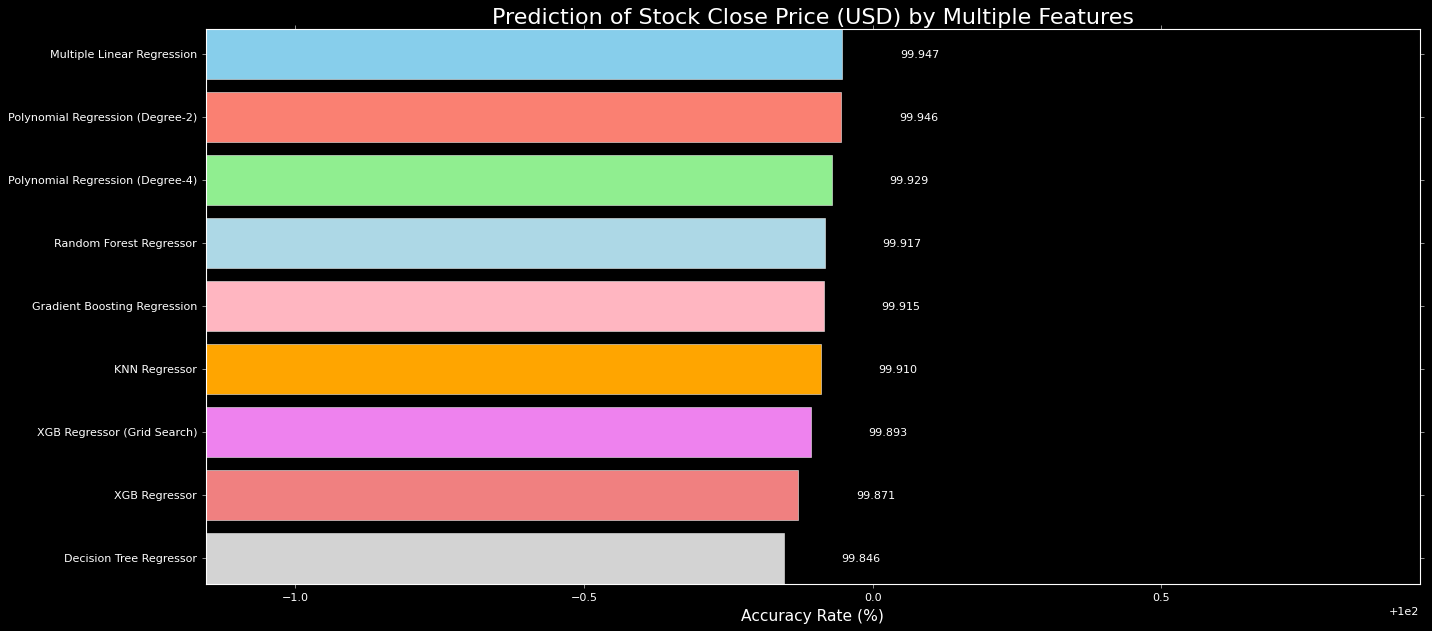

In [ ]:
# Comparing the
algorithms = [
    'Multiple Linear Regression',
    'Polynomial Regression (Degree-2)',
    'Polynomial Regression (Degree-4)',
    'KNN Regressor',
    'XGB Regressor',
    'XGB Regressor (Grid Search)',
    'Decision Tree Regressor',
    'Random Forest Regressor',
    'Gradient Boosting Regression'
]

accuracy_rates = [
    99.947,    # Multiple Linear Regression
    99.946,    # Polynomial Regression (Degree-2)
    99.929,    # Polynomial Regression (Degree-4)
    99.910,    # KNN Regressor
    99.871,    # XGB Regressor
    99.893,    # XGB Regressor (Grid Search)
    99.846,    # Decision Tree Regressor
    99.917,    # Random Forest Regressor
    99.915     # Gradient Boosting Regression
]

colors = [
    'skyblue', 'salmon', 'lightgreen', 'orange', 'lightcoral', 'violet', 'lightgray', 'lightblue','lightpink'
]

# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]


# Sort the data in descending order
sorted_indices = sorted(range(len(accuracy_rates)), key=lambda k: accuracy_rates[k])
algorithms = [algorithms[i] for i in sorted_indices]
accuracy_rates = [accuracy_rates[i] for i in sorted_indices]
colors = [colors[i] for i in sorted_indices]

# Create the bar chart
fig, ax = plt.subplots(figsize=(18, 8))

# Set dark background
fig.patch.set_facecolor('black')
ax.set_facecolor('black')

# Create bars with colors
bars = ax.barh(algorithms, accuracy_rates, color=colors)

# Customize x-axis and y-axis ticks and labels
ax.xaxis.set_tick_params(color='white', labelcolor='white')
ax.yaxis.set_tick_params(color='white', labelcolor='white')

# Hide gridlines and spines (borders)
ax.xaxis.grid(False)  # Turn off x-axis gridlines
ax.yaxis.grid(False)  # Turn off y-axis gridlines


# Add labels and title
ax.set_xlabel('Accuracy Rate (%)', color='white', fontsize = 14)
#ax.set_ylabel('Algorithms', color='white')
ax.set_title('Prediction of Stock Close Price (USD) by Multiple Features', color='white', fontsize = 20)

# Adjust x-axis limits
ax.set_xlim(min(accuracy_rates) - 1, max(accuracy_rates) + 1)

# Display values on the bars
for bar in bars:
    width = bar.get_width()
    ax.text(width + 0.1, bar.get_y() + bar.get_height()/2, f'{width:.3f}',
            va='center', ha='left', fontsize=10, color='white')

# Hide y-axis labels
ax.yaxis.set_visible(True)

# Show the plot
plt.tight_layout()
plt.show()

In [ ]:
df1.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,Stock,Week,Month,Year
1005,2023-11-27,0.716486,0.715732,0.740515,0.731689,2.152042,-0.494604,IBM,48,11,2023
1006,2023-12-07,0.899455,0.877443,0.899879,0.873208,2.312761,-0.614826,IBM,49,12,2023
1007,2023-12-12,0.968563,1.025197,0.989941,1.009858,2.467951,-0.110240,IBM,50,12,2023
1008,2023-12-22,0.902499,0.905962,0.931324,0.931642,2.379123,-0.995003,IBM,51,12,2023
1009,2023-12-27,0.964605,0.943280,0.982614,0.971815,2.424747,-0.748479,IBM,52,12,2023


Test Data

Predicting test data

#8. Deployment

### Deployment using Gradio

In [82]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.linear_model import LinearRegression

regre = LinearRegression()
XX = df1[['Open', 'High', 'Low']].values
YY = df1['Close'].values

#splitting dataset for training and testing
XX_train, XX_test, YY_train, YY_test = train_test_split(XX, YY, train_size = 0.8, random_state = 0)

#training
regre.fit(XX_train, YY_train)

#prediction
YY_hat = regre.predict(XX_test)

#evaluation
print('The R2 Score is:', (r2_score(YY_test, YY_hat))*100)
print('The MSE is:', mean_squared_error(YY_test , YY_hat))
print('The MAE is:', mean_absolute_error(YY_test ,YY_hat))
print('The RMSE is:', np.sqrt(mean_squared_error(YY_test,YY_hat)))

The R2 Score is: 99.94781229193343
The MSE is: 0.00046676381917045107
The MAE is: 0.015244222788623519
The RMSE is: 0.021604717521190853


In [83]:
!pip install gradio==3.43.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 39.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.2/298.2 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.1/141.1 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 71.9/71.9 kB 4.7 MB/s eta 0:00:00


In [84]:
import joblib

joblib.dump(regre, 'regre.pkl')

regre = joblib.load('regre.pkl')

In [86]:
import gradio as gr
import joblib
import numpy as np

# Define the prediction function
def predict_close_price(Open, High, Low):
    # Prepare the input data for the model
    input_features = np.array([[Open, High, Low]])

    # Make the prediction
    prediction = regre.predict(input_features)

    return prediction[0]

# Create the Gradio interface
iface = gr.Interface(
    fn=predict_close_price,  # Function to call for predictions
    inputs=[
        gr.inputs.Number(label="Stock Open Price:"),  # Input for open price
        gr.inputs.Number(label="Stock High Price:"),  # Input for high price
        gr.inputs.Number(label="Stock Low Price:")    # Input for low price
    ],
    outputs=gr.Number(label="Stock Closing Price (USD)"),  # Output type with label
    title="IBM Stock Closing Price Prediction",  # Title of the app
    description="Enter the Open, High, and Low prices in USD to predict the Stock Closing Price of the Stock."  # Description
)

# Launch the Gradio app
if __name__ == "__main__":
    iface.launch(share=True)


<ipython-input-86-6246b8207aa6>:19: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Stock Open Price:"),  # Input for open price
<ipython-input-86-6246b8207aa6>:19: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Stock Open Price:"),  # Input for open price
<ipython-input-86-6246b8207aa6>:20: GradioDeprecationWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  gr.inputs.Number(label="Stock High Price:"),  # Input for high price
<ipython-input-86-6246b8207aa6>:20: GradioDeprecationWarning: `optional` parameter is deprecated, and it has no effect
  gr.inputs.Number(label="Stock High Price:"),  # Input for high price
<ipython-input-86-6246b8207aa6>:21: GradioDeprecationWarning: Usage of gradio.inputs is depr

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
IMPORTANT: You are using gradio version 3.43.1, however version 4.29.0 is available, please upgrade.
--------
Running on public URL: https://b4cf2007e28c38b353.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
